## Homework 4

- ### Release Date: Sunday, April 5
- ### Due Date: Saturday April 19, 11:59 PM

### Introduction

We will explore fitting linear regression models to data. Along the way, we will get experience with an iterative method for guess-and-check called gradient descent. These approaches are helpful throughout data science particularly the field of machine learning. By completing Homework 4, you should take away...

- Practice reasoning about a model and building intuition for loss functions. 

- Determining the gradient of a loss function with respect to model parameters and using the calculations for gradient descent.

We will apply these skills in Homework 5 to a real-world dataset. We will guide you through the problems step by step. However, we encourage you to discuss with us in Office Hours and on Piazza so that we can work together through these steps. 

#### Submission Instructions

Submission of homework requires two steps. See **Homework 0** for more information.

##### _Step 1_
You are required to **submit your notebook on JupyterHub**. Please navigate to the `Assignments` tab to  
- fetch
- modify 
- validate
- submit 

your notebook. Consult the [instructional video](https://nbgrader.readthedocs.io/en/stable/user_guide/highlights.html#student-assignment-list-extension-for-jupyter-notebooks) for more information about JupyterHub.

##### _Step 2_
You are required to **submit a copy of your notebook to Gradescope**. Follow these steps

##### _Formatting Instructions_


1. Download as HTML (`File->Download As->HTML(.html)`). 
1. Open the HTML in the browser. Print to .pdf 
1. Upload to Gradescope. Consult the [instructional video](https://www.gradescope.com/get_started#student-submission) for more information about Gradescope. 
1. Indicate the location of your responses on Gradescope. You must tag your answer's page numbers to the appropriate question on Gradescope. See instructional video for more information.

Note that 

- You should break long lines of code into multiple lines. Otherwise your code will extend out of view from the cell. Consider using `\` followed by a new line. 
- For each textual response, please include relevant code that informed your response. 
- For each plotting question, please include the code used to generate the plot. If your plot does not appear in the HTML / pdf output, then use `Image('name_of_file', embed = True)` to embed it.
- You should not display large output cells such as all rows of a table. 

**Important**: Gradescope points will be awarded if and only if all the formatting instructions are followed. 

#### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** below.

**Name:** Richie Doherty

**NetId:** rd2414

**Collaborators:** Madi Perez

#### Rubric

Question | Points
--- | ---
Gradescope | 2
Question 1a | 1
Question 1b | 1
Question 1c | 1
Question 1d | 1
Question 1e | 1
Question 2a | 2
Question 2b | 1
Question 2c | 1
Question 2d | 1
Question 3a | 1
Question 3b | 2
Question 3c | 1
Question 4a | 1
Question 4b | 2
Question 4c | 1
Question 4d | 2
Question 5a | 1
Question 5b | 1
Question 5c | 1
Question 5d | 0
Question 5e | 0
Total | 25

In [1]:
# Import some packages for data science
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go

import dsua_112_utils

# Set some parameters
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.dpi'] = 150

sns.set(font_scale=1.5)

pd.options.display.max_rows = 20  
pd.options.display.max_columns = 15

plotly.offline.init_notebook_mode(connected=True)

# Import some packages to help with configuration
import os, sys, pathlib
from IPython.display import Image
from ipywidgets import widgets, interact

In [2]:
home_path = os.environ["HOME"]
assignment_path = f'{home_path}/shared/HW4'
data_path = f'{assignment_path}/data.csv' 
image_path = f'{assignment_path}/images' 

In [3]:
# TEST 

assert 'pandas' in sys.modules and "pd" in locals()
assert 'numpy' in sys.modules and "np" in locals()
assert 'matplotlib' in sys.modules and "plt" in locals()
assert 'seaborn' in sys.modules and "sns" in locals()
assert 'plotly' in sys.modules and "go" in locals()
assert "home_path" in locals()

### Question 0 : Load Data
Load the data.csv file into a pandas dataframe.  
Note that we are reading the data directly from the URL address.

In [4]:
# Run this cell to load our sample data

data = pd.read_csv(f'{data_path}')
data

,x,y
0,0.765305,0.867769
1,-4.590188,-11.998300
2,-3.038538,-8.163570
3,-0.505511,-1.914896
4,-4.438790,-12.028043
...,...,...
295,-4.895823,-12.366365
296,-2.002381,-3.938511
297,0.999034,1.341256
298,-3.277003,-8.479990


### Question 1: A Linear Model
We will start by examining our data and creating a linear model that can represent this data.

### Question 1a
we can visualize the data in a scatter-plot. 

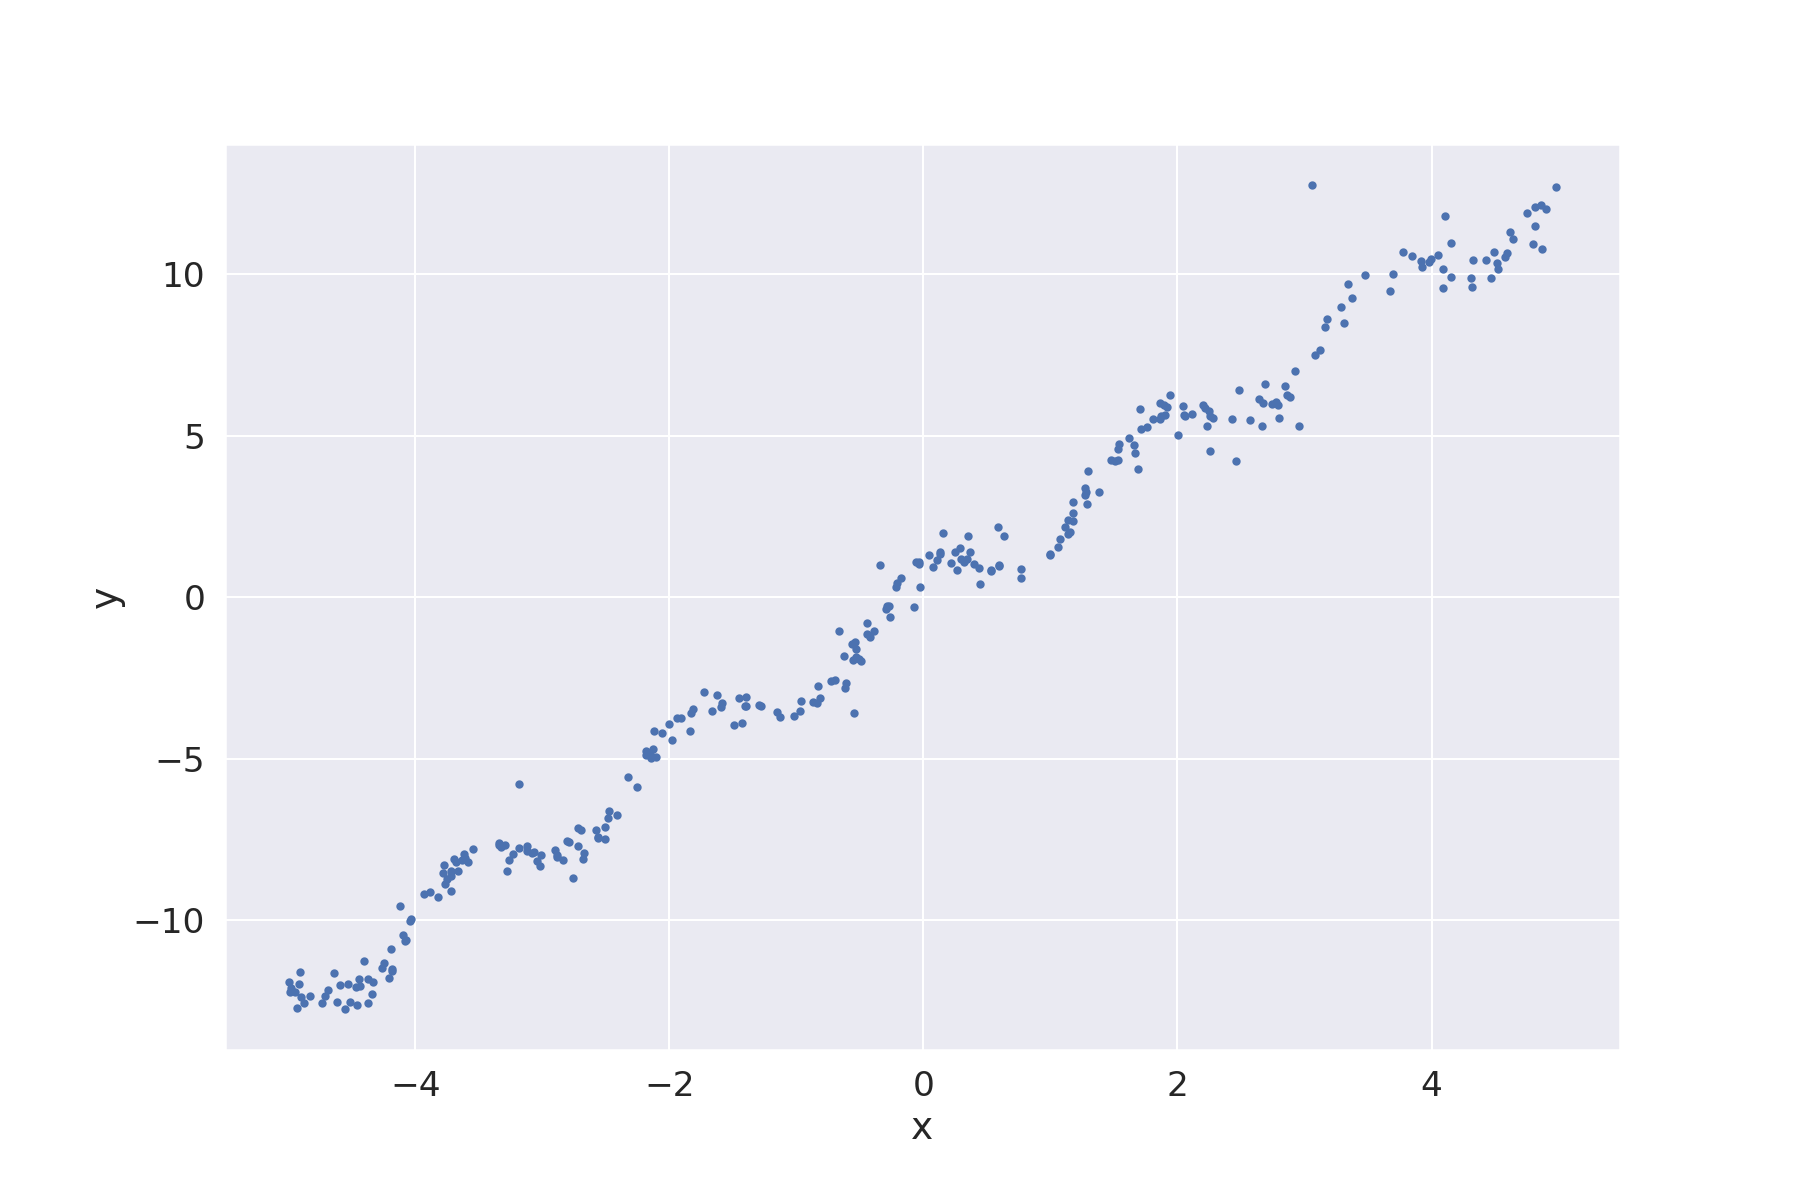

In [5]:
Image(f'{image_path}/scatter.png')

Use matplotlib to generate the above scatter-plot. Remember to label the horizontal axis `x` and the vertical axis `y`.

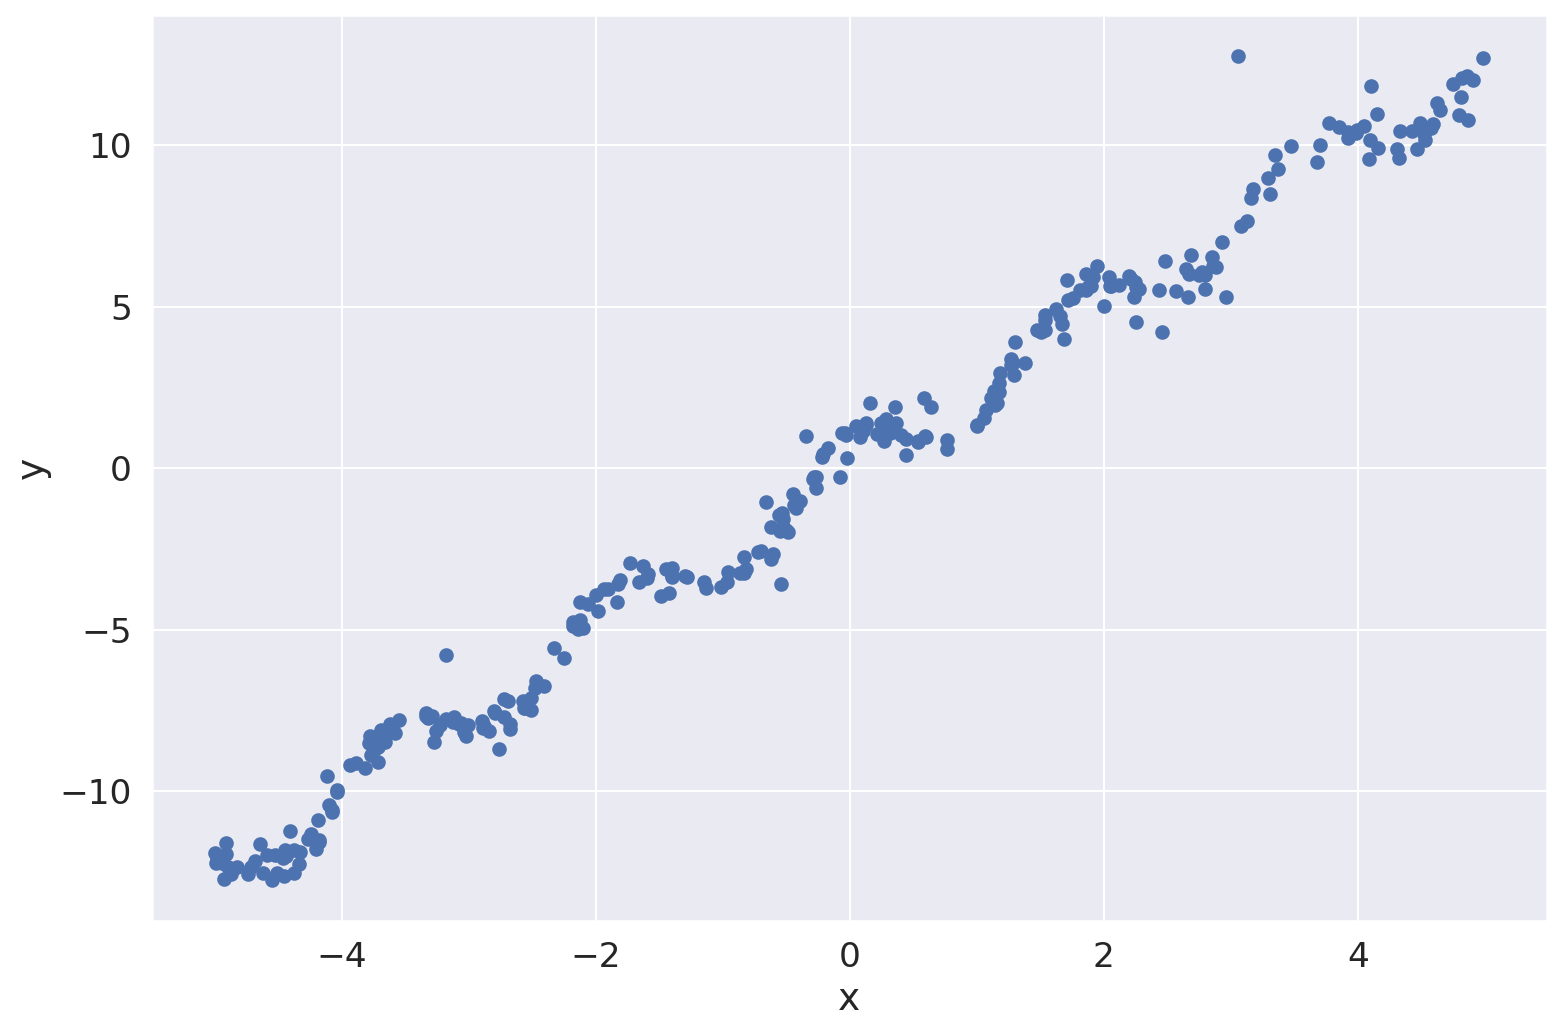

In [6]:
def scatter(x, y):
    """
    Generate a scatter plot using x and y

    Input:
    x -- the vector of values x
    y -- the vector of values y
    """
    z = plt.scatter(x,y)
    plt.xlabel("x")
    plt.ylabel('y')
    return z
    # YOUR CODE HERE
    #raise NotImplementedError()

scatter(data['x'], data['y'])

q1b_gca = plt.gca() # keep this line for testing

In [7]:
# TEST 

assert "q1b_gca" in locals()
assert set(data["x"]) == set(dsua_112_utils.get_scatter(q1b_gca)[:,0])


Note that the dataset in the `x` column and the dataset in the `y` appear to have positive correlation. While the scatter-plot resembles a line, we notice that the points move up and down like a [sinusoid](https://en.wikipedia.org/wiki/Sine_wave)

### Question 1b

Compute the correlation of `data["x"]` and `data["y"]`.

In [8]:
correlation = data['x'].corr(data["y"])
correlation
# YOUR CODE HERE
#raise NotImplementedError()

0.9929638359250123

In [9]:
# TEST 

assert -1 <= correlation <= 1


### Question 1c
While the points move up and down like a sinusoid, we might have a linear relationship in the population. For example, if we have measurement errors in the sample, then the points in the sample will not follow the trends in the population.   

Assuming we have a linear relationship in the population, we can predict the value $y$ using the value $x$  

$$\theta^* \cdot x$$

Here the parameter $\theta^*$ is the slope of the line. Since we might not find the value of the parameter $\theta^*$, we will guess $\theta^*$ by fitting a linear model to the data in the sample. The linear model is

$$
\theta \cdot x
$$

Based on this equation, define the linear model function `linear_model` below to predict the $y$-values from the $\textbf{x}$ values along with $\theta$.

In [10]:
def linear_model(x, theta):
    """
    Returns the estimate of y given x and theta

    Input:
    x -- the vector of values x
    theta -- the scalar theta
    """
    y = theta * x
    # YOUR CODE HERE
    #raise NotImplementedError()
    return y

In [11]:
assert linear_model(0, 1) == 0
assert np.sum(linear_model(np.array([3, 5]), 3)) == 24


### Question 1d
We learned about the square loss to measure the difference between predicted and observed values. If we take the average of the square loss over a dataset, then we have the mean square error. 

The mean square error depends on the unknown parameters in the model. If we can minimize the mean square error with respect to these unknown parameters, then we have fit the model to the data. Call the input to the mean square error that minimizes the output $\widehat{\theta}$. We guess that $\widehat{\theta}$ approximates $\theta^*$.

Define the mean square error loss function `mse`. You should use `numpy` instead of loops.

In [12]:
def mse(y, y_hat):
    """
    Returns the average square loss between observed value y and predicted value y_hat

    Input:
    y -- the vector of true values y
    y_hat -- the vector of predicted values y_hat
    """
    return np.array((y - y_hat) ** 2).mean()
    # YOUR CODE HERE
    #raise NotImplementedError()

In [13]:
assert mse(2, 1) == 1
assert mse(2, 0) == 4 
assert mse(np.array([5, 6]), np.array([1, 1])) == 20.5


### Question 1e

We can visualize the mean square error for different values of the parameter $\theta$

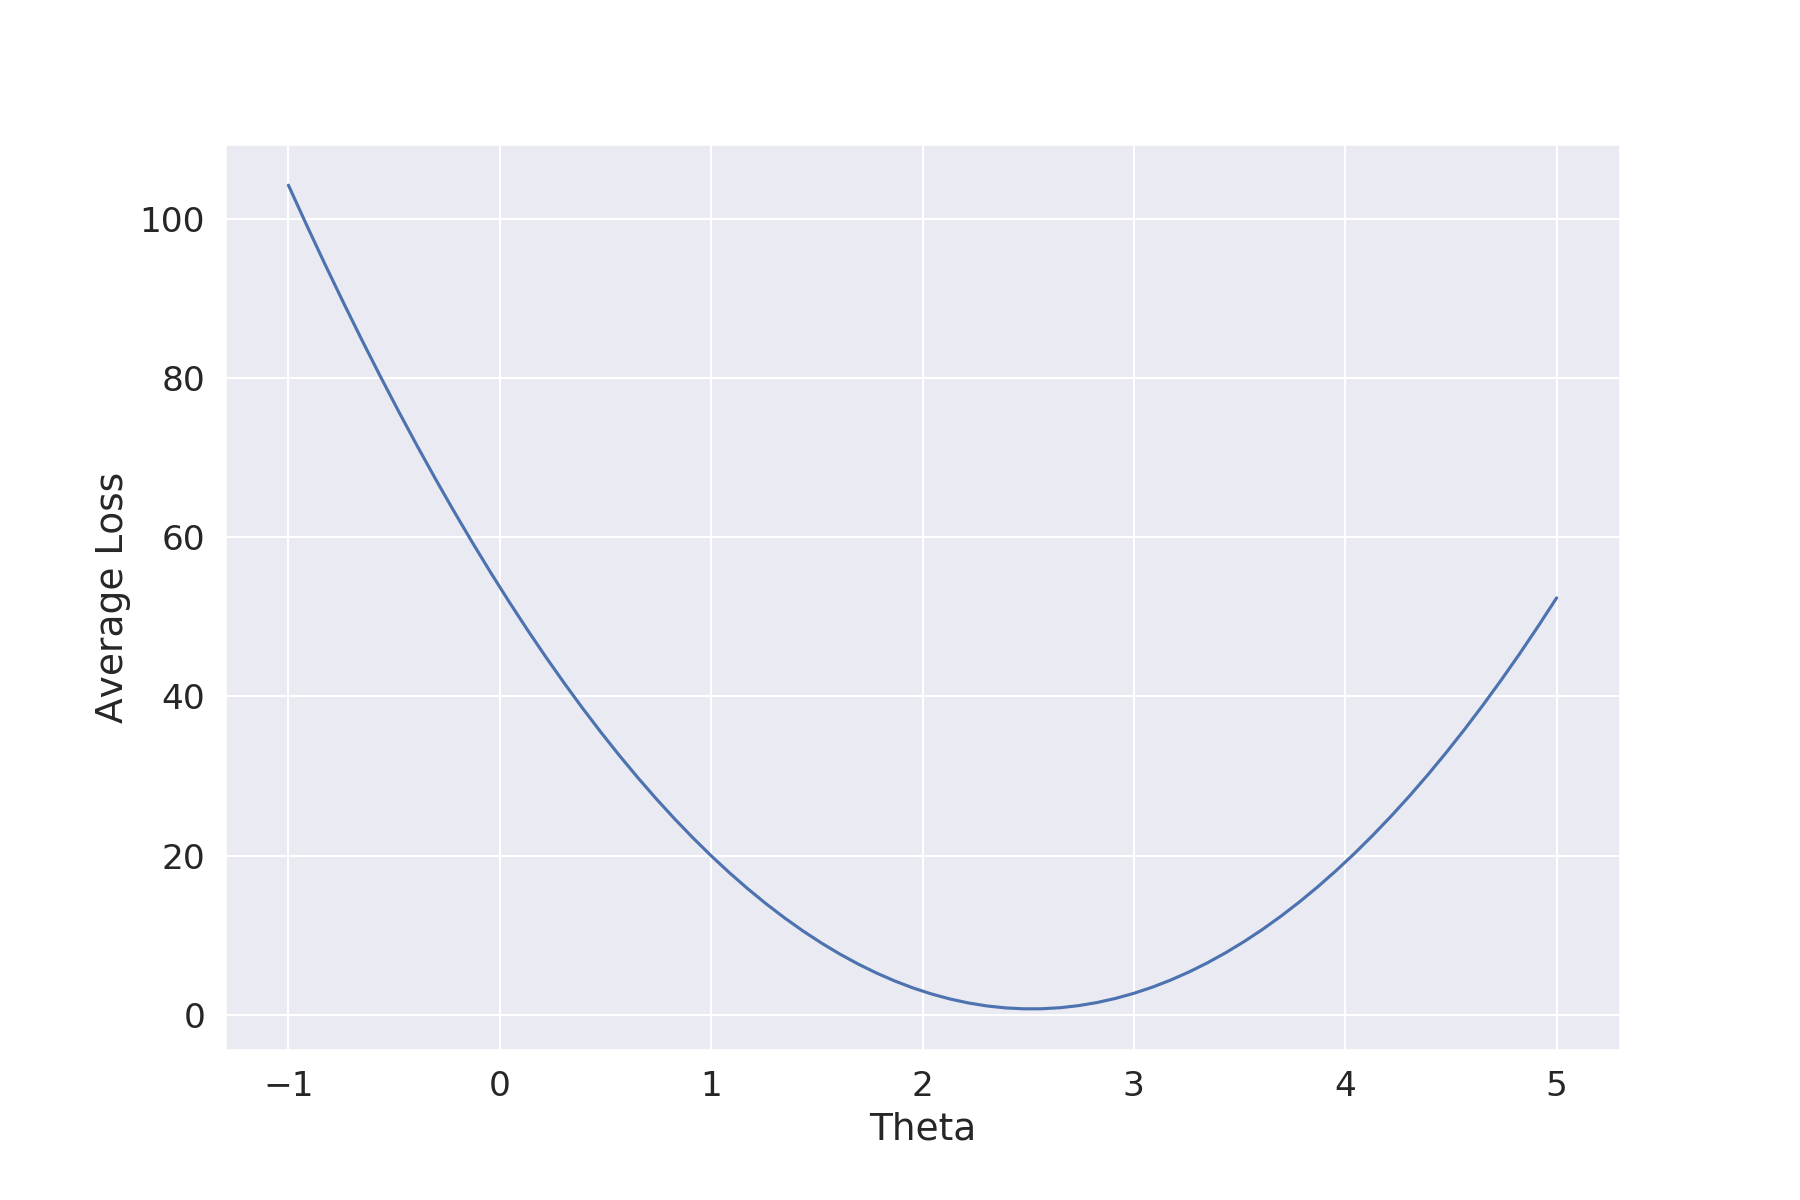

In [14]:
Image(f"{image_path}/average_l2_loss.png")

Use `matplotlib` to generate the line-chart. For the values, you can use the functions you wrote in Question 1c for  `linear_model` and Question 1d for `mse`

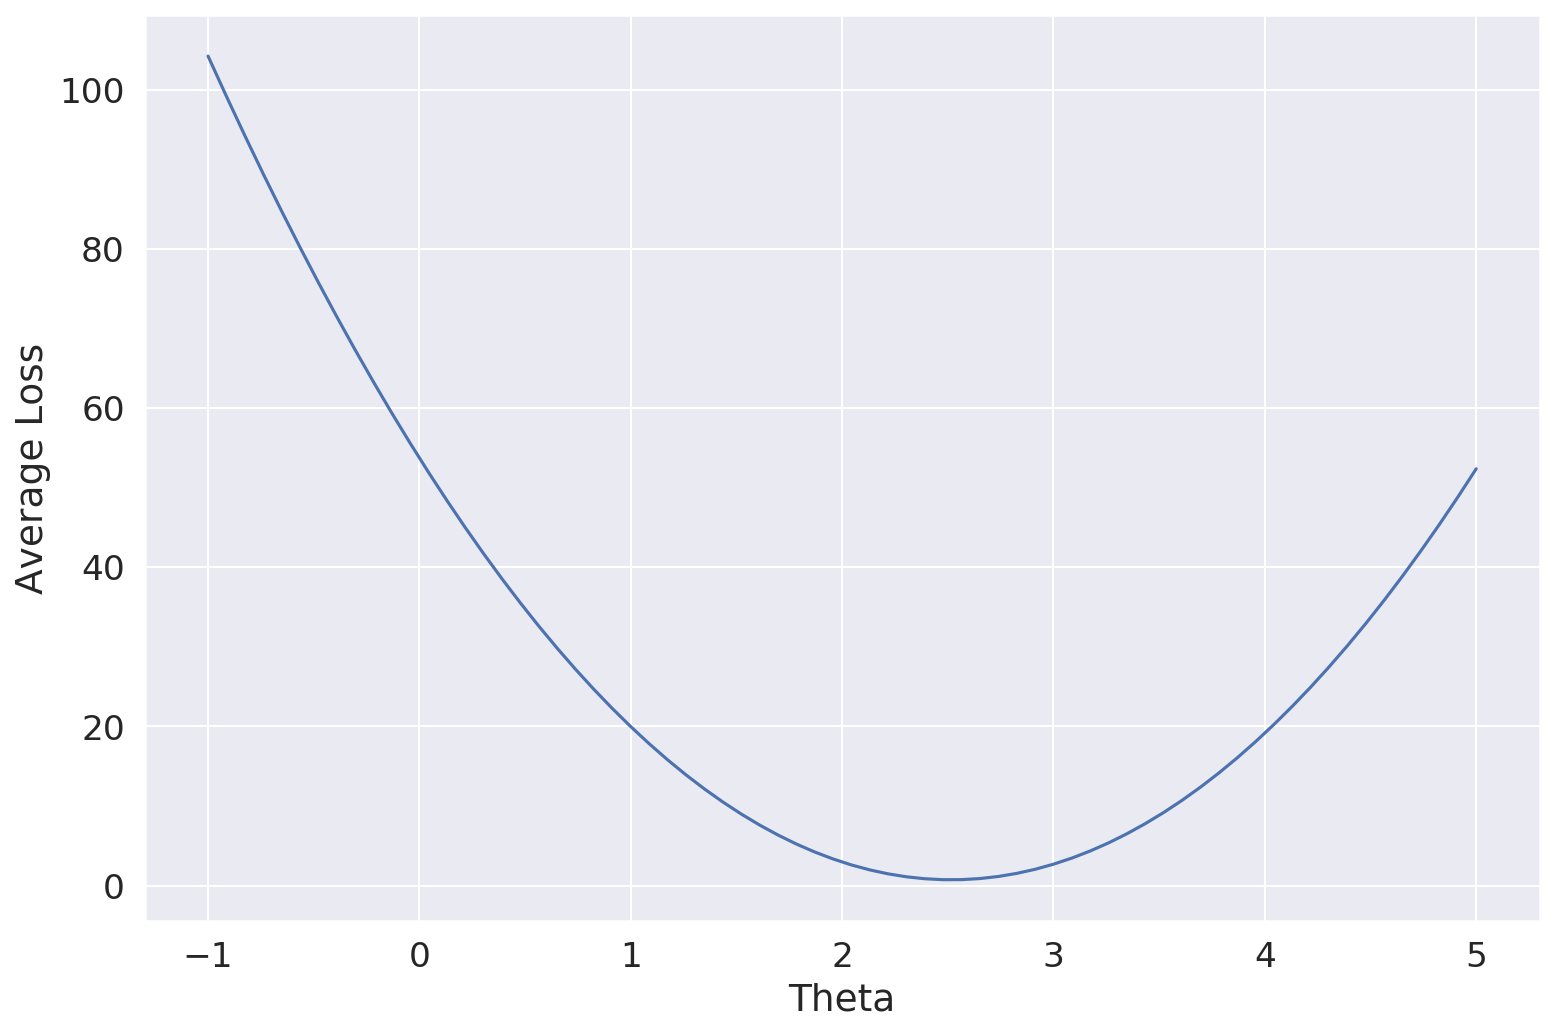

In [15]:
def visualize(x, y, thetas):
    """
    Plots the mean square error for given x, y as a function of theta.

    Input:
    x -- the vector of values x
    y -- the vector of values y
    thetas -- an array containing different estimates of the scalar theta
    """
    
    avg_loss = []
    for t in thetas:
        loss = mse(y,linear_model(x,t))
        avg_loss.append(loss)
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    plt.plot(thetas, avg_loss)
    plt.xlabel("Theta")
    plt.ylabel("Average Loss")
    
thetas = np.linspace(-1, 5, 70)
visualize(data["x"], data["y"], thetas)

Based on the visualization, can you guess the input that minimizes the output? Set `theta_star_guess` to the value of $\theta$ that appears to minimize our loss. Remember that the input minimizing the output is $\widehat{\theta}$.

In [16]:
theta_star_guess = 2.5
# YOUR CODE HERE
#raise NotImplementedError()

In [17]:
assert -1 <= theta_star_guess <= 5



### Question 2: Fitting the Linear Model
We have defined the linear model and the loss function. So we can try to fit the model to the data. Here we can calculate the input that minimizes the output with derivatives. 

$\begin{align*}
L(\textbf{x}, \textbf{y}, \theta) &= \frac{1}{n} \sum_{i=1}^n (\theta \cdot x_i - y_i)^2 \\
\frac{\partial L}{\partial \theta} &= \frac{2}{n} \sum_{i=1}^n (\theta \cdot x_i - y_i) \cdot x_i \\ 
&= \frac{2}{n} (\theta \sum_{i=1}^n x_i^2 - \sum_{i=1}^n x_i y_i) = 0 \\
\hat{\theta} &= \frac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_i^2}
\end{align*}$

We want to use the derivative because it tells us the rate of change of the function. The rate of change of the function at a point gives us the slope of the line that touches the curve at the point. Use the widget to check different inputs. Note that the slope should have value near zero about your guess from Question 1e.

In [18]:
def function(theta):
    return np.mean((theta * data["x"] - data["y"])**2)

def derivative(theta):
    difference = theta * data["x"] - data["y"]
    return 2 * np.mean(difference * data["x"])

xrange = np.linspace(-1, 5, 100)

def widget_function(Input):
     return dsua_112_utils.plotter(Input, xrange, function, derivative)

In [19]:
interact(widget_function, Input=widgets.IntSlider(value=0, min=-1, max=5, step=1));

interactive(children=(IntSlider(value=0, description='Input', max=5, min=-1), Output()), _dom_classes=('widget…

### Question 2a
Since we have a formula for $\hat{\theta}$, namely, $$\hat{\theta} = \frac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_i^2}$$ we can implement a function `find_theta` that calculates the numerical value of $\hat{\theta}$ based on our data $\textbf{x}$, $\textbf{y}$.

In [20]:
def find_theta(x, y):
    """
    Find optimal theta given x and y

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    """
    theta_opt = sum(x*y)/sum(x**2)
    # YOUR CODE HERE
    #raise NotImplementedError()
    return theta_opt

In [21]:
# TEST

assert -1 <= find_theta(data["x"], data["y"]) <= 5


### Question 2b

We want to add to the chart from Question 1e. Use `visualize` to generate a chart. Now add a vertical line at $ \hat{\theta}$. Try to use the matplotlib function `axvline`.

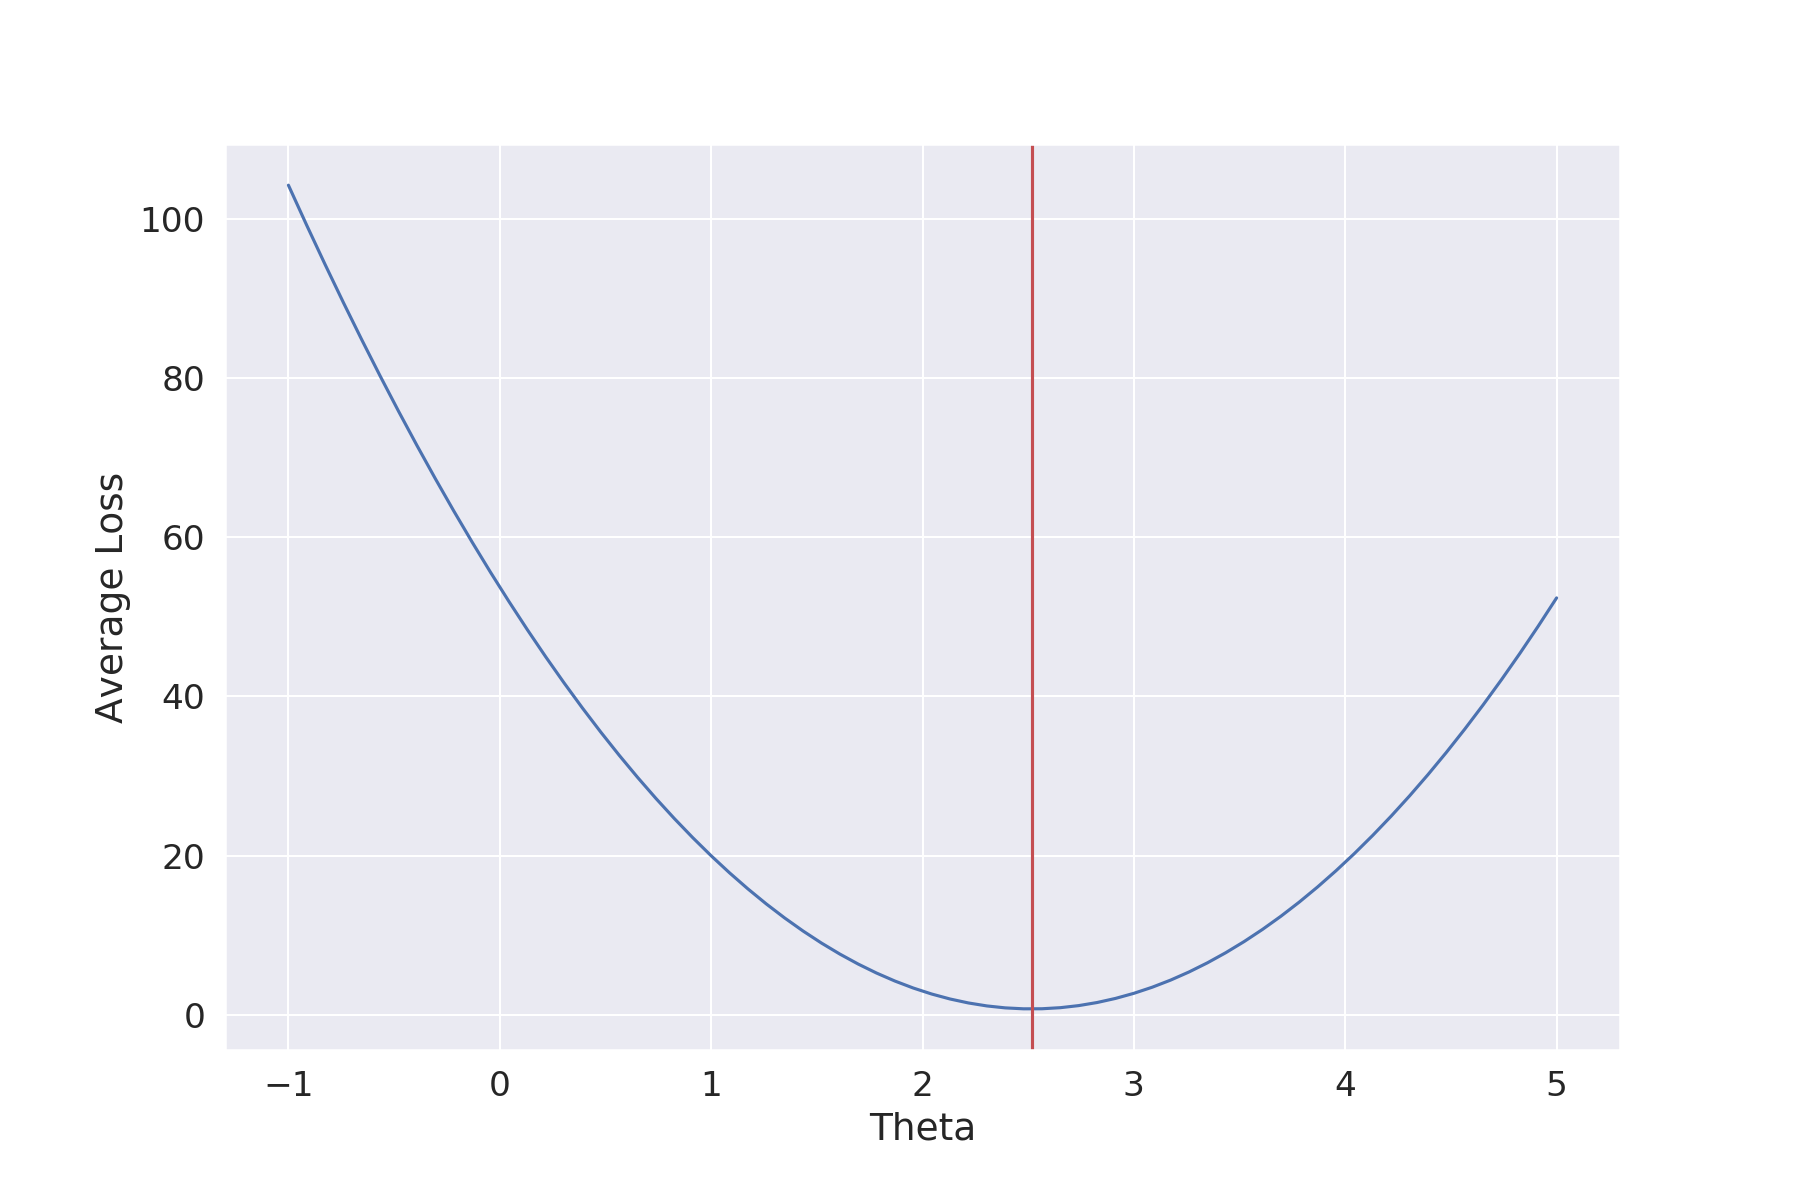

In [22]:
Image(f"{image_path}/vertical_linear.png")

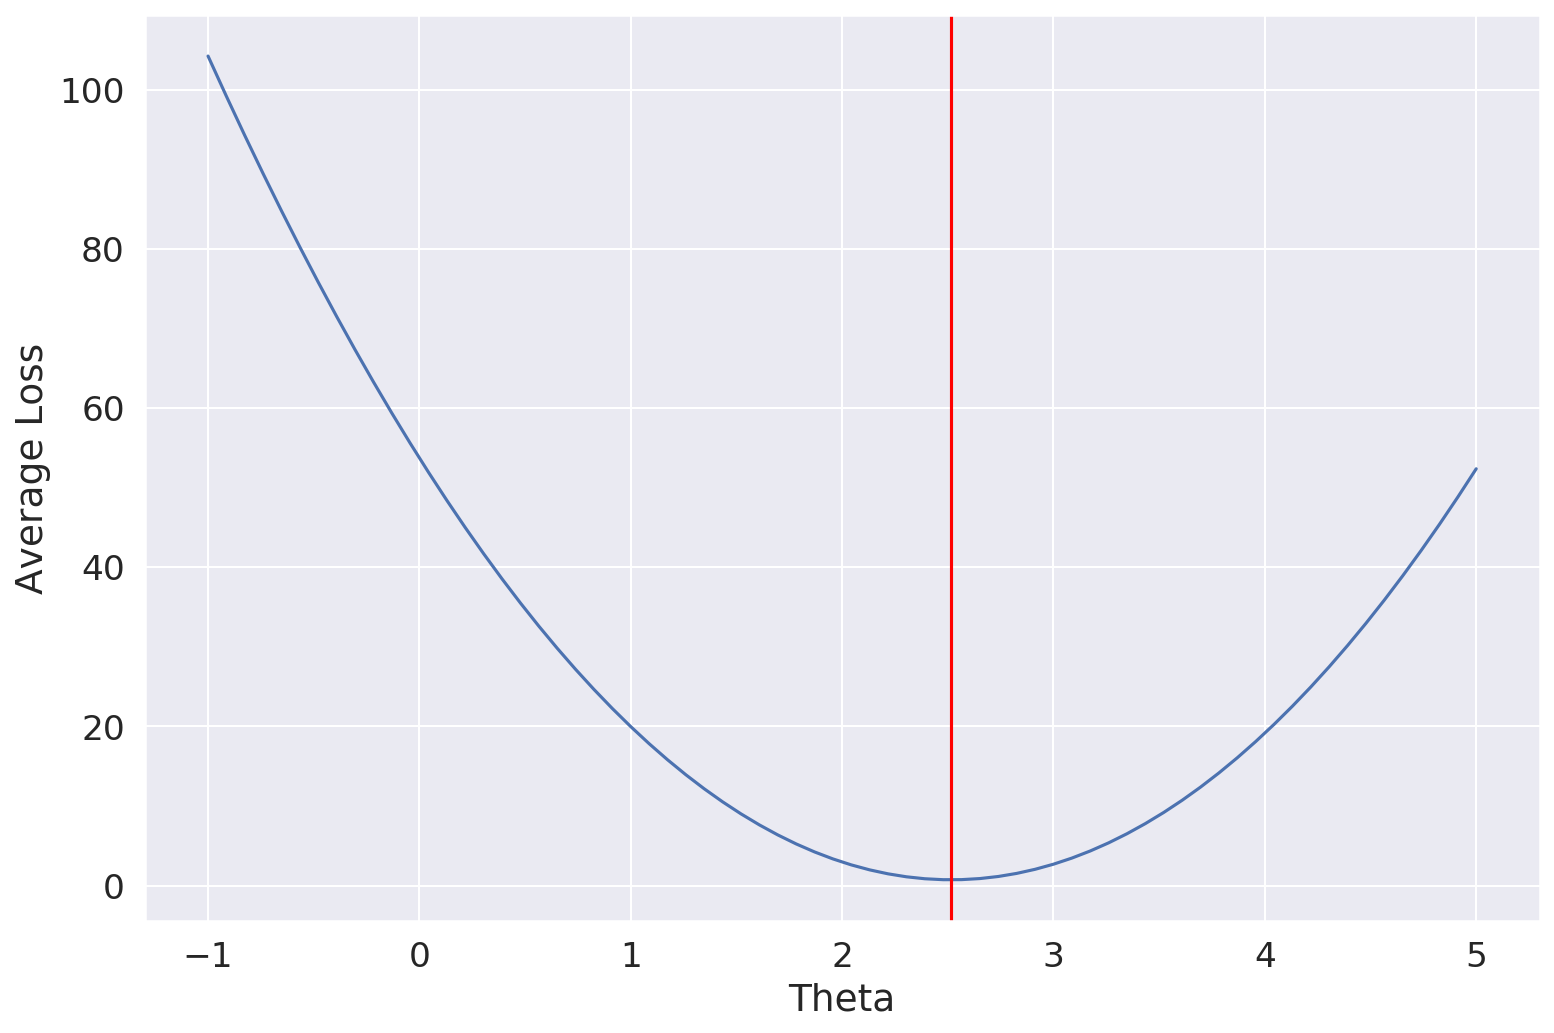

In [23]:
theta_opt = find_theta(data['x'], data['y'])
visualize(data['x'], data['y'],thetas)
plt.axvline(x = theta_opt, color = 'red')

# YOUR CODE HERE
#raise NotImplementedError()

q2b_gca = plt.gca() # keep this line for testing

In [24]:
# TEST 

assert "q2b_gca" in locals()
assert len(q2b_gca.get_lines()) > 1


### Question 2c
Since we have the value for $\theta$ that minimizes the average loss, we can determine a line. Plot the scatter-plot of the data from Question 1a using `scatter`. Add the line $$y = \hat{\theta} \cdot x$$ using the value of $\hat{\theta}$ from Question 2a.

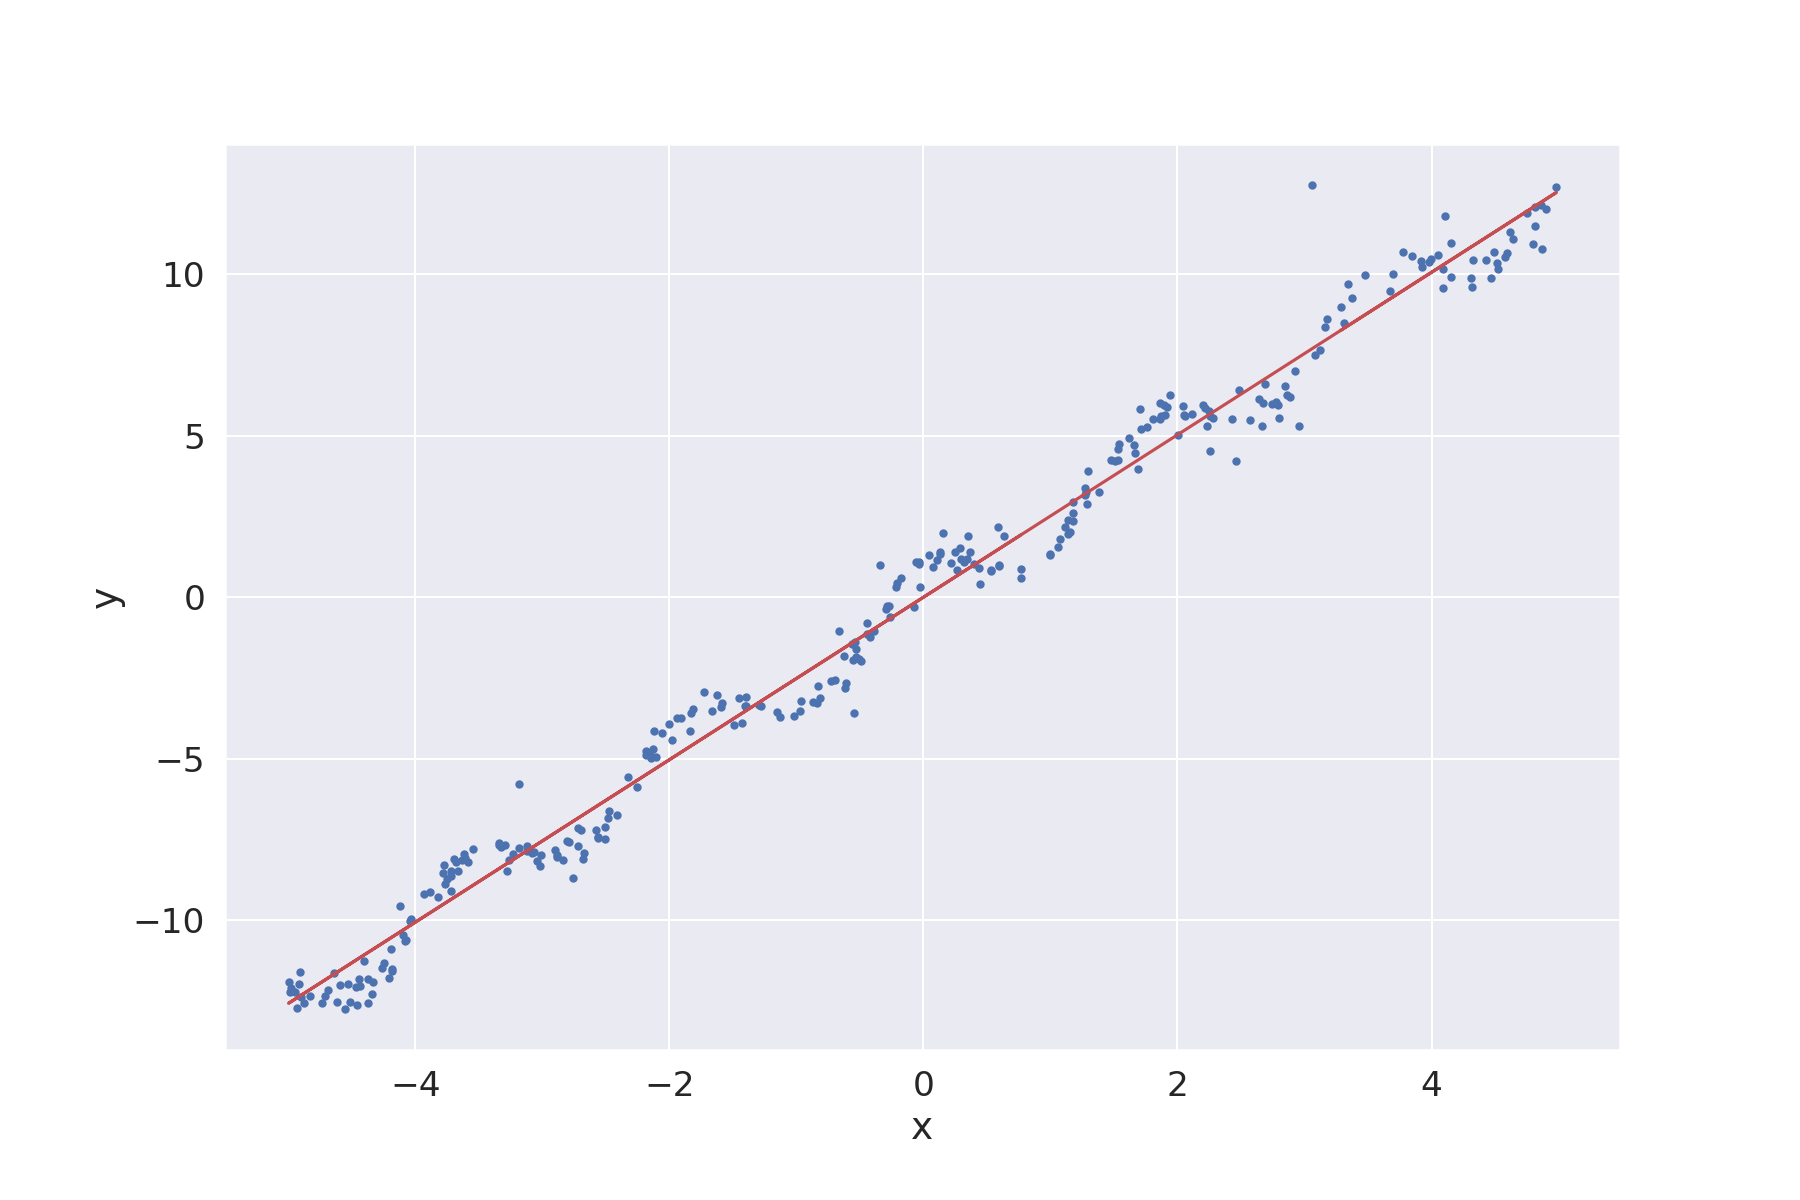

In [25]:
Image(f"{image_path}/scatter_with_line.png")

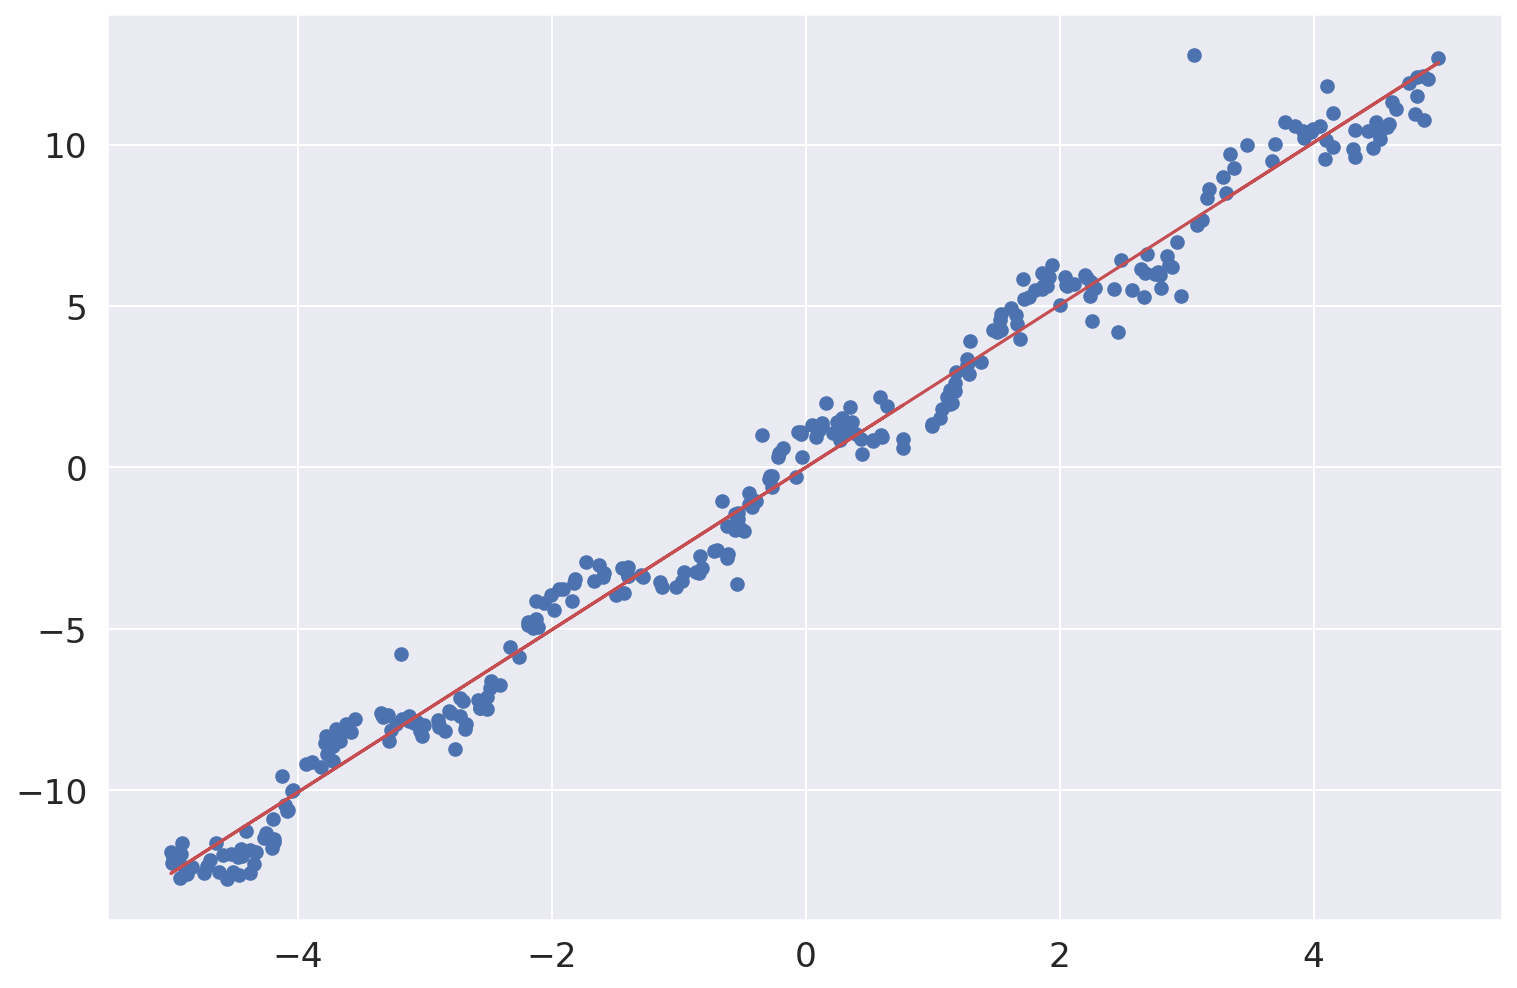

In [26]:
#find the minimum
theta_opt = find_theta(data['x'], data['y'])
#plot scatter
plt.scatter(data['x'], data['y'])
# draw linear line
line = linear_model(data['x'], theta_opt)
#plot line
plt.plot(data['x'], line, color = 'r')


# YOUR CODE HERE
#raise NotImplementedError()

q2d_gca = plt.gca() # keep this line for testing

In [27]:
# TEST 

assert "q2d_gca" in locals()
assert 1 == len(q2d_gca.get_lines())


### Question 2d
It seems that we can capture much of the pattern in the data with one parameter $\hat{\theta}$. Let us try to calculate the residuals to check whether we have missed anything?

$$\textbf{r}=\textbf{y}-\hat{\theta} \cdot \textbf{x}$$ 

Below, write a function to find the residual and plot the residuals corresponding to $x$ in a scatter plot. Plot a horizontal line at $y=0$ to assist the interpretation of the chart. Try to use the matplotlib function `axhline`.

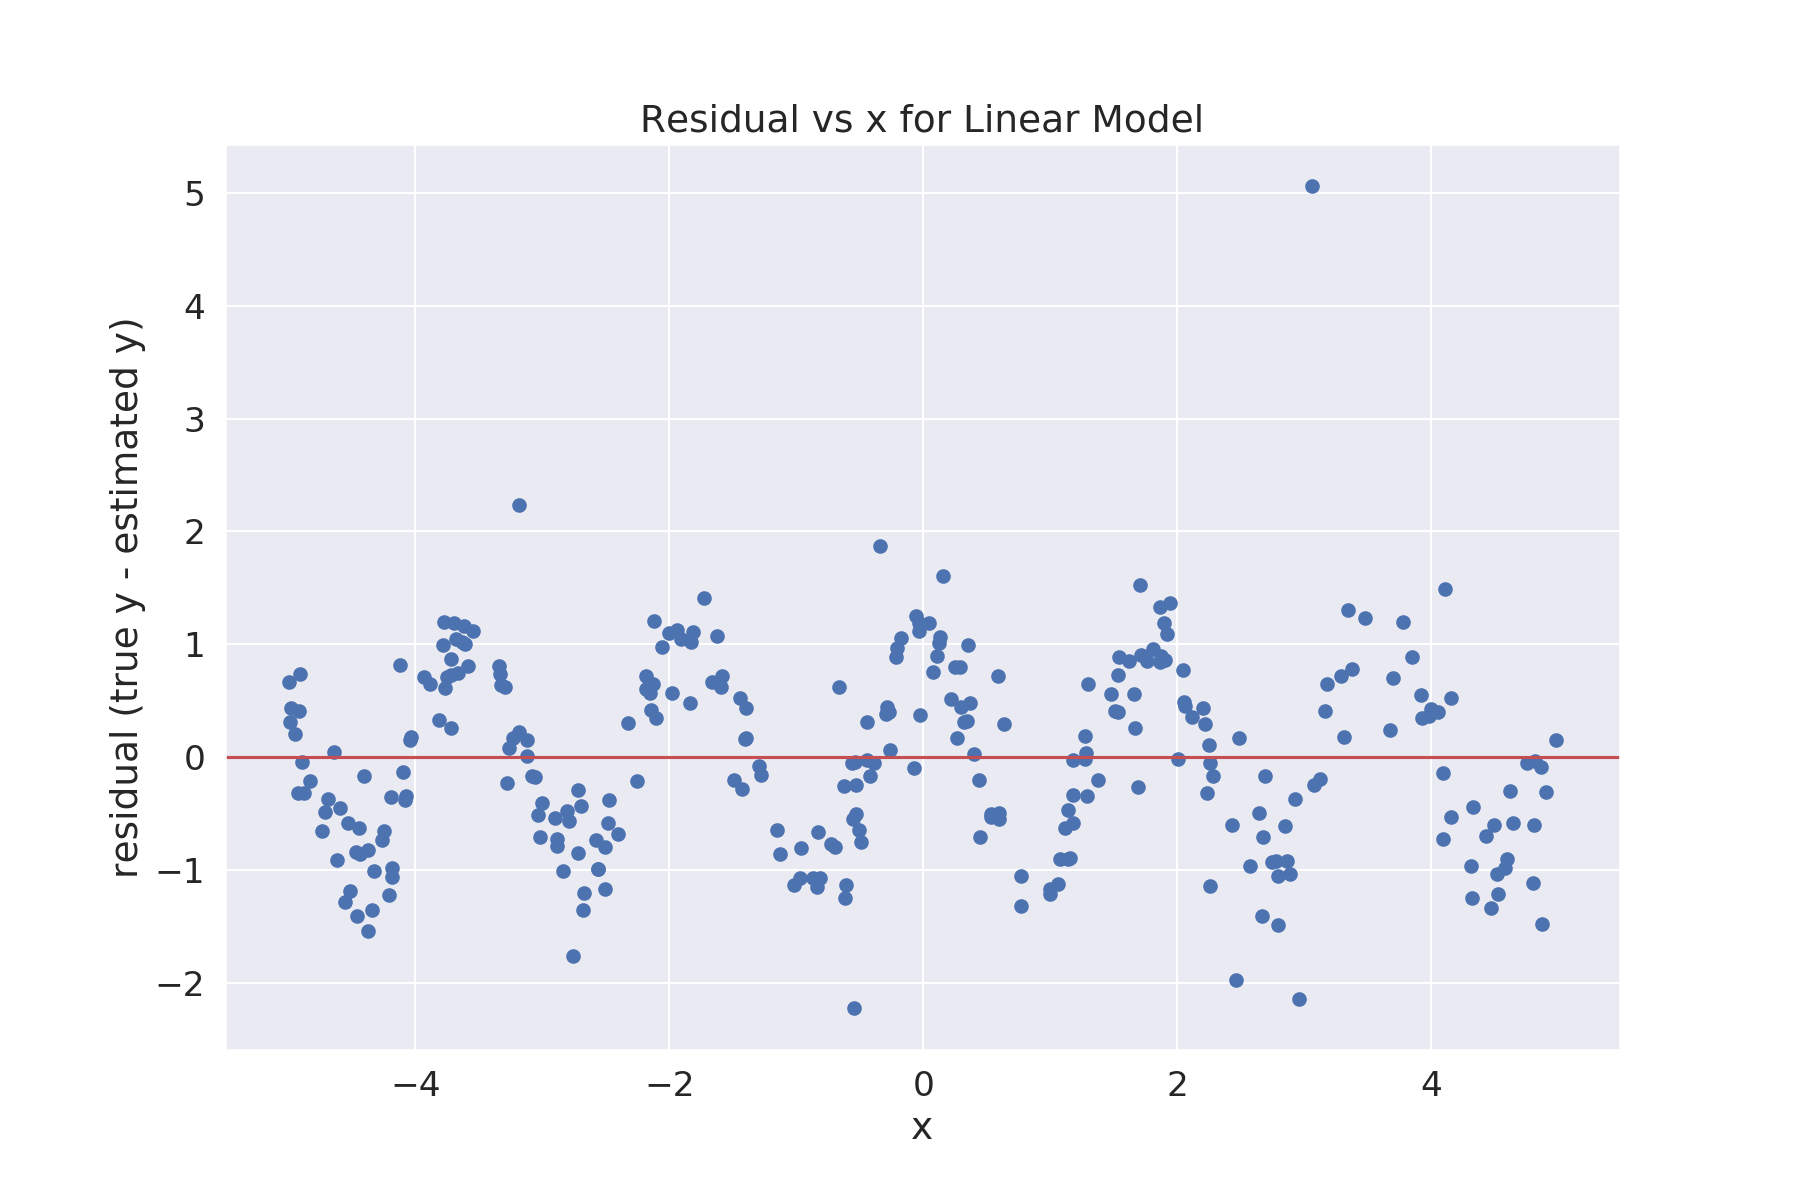

In [28]:
Image(f"{image_path}/residual.png")

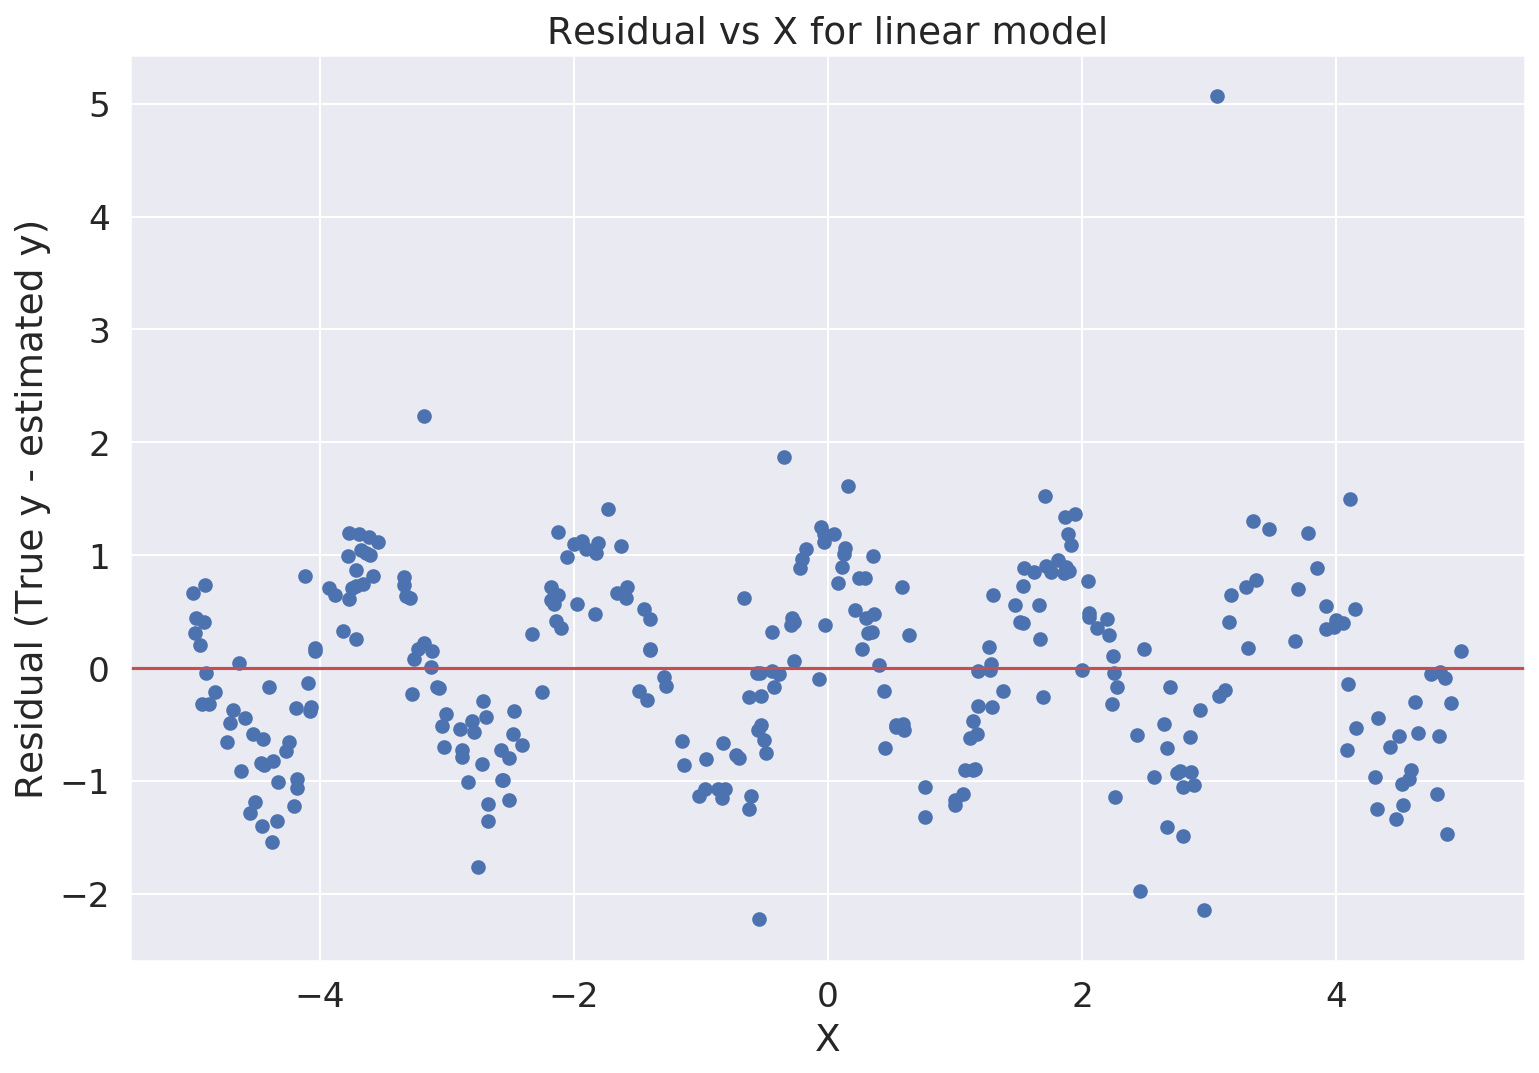

In [29]:
def visualize_residual(x, y):
    """
    Plot a scatter plot of the residuals, the remaining 
    values after removing the linear model from our data.

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    """
    ...

    theta_opt = find_theta(x, y)
    residual = y - linear_model(x, theta_opt)
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    plt.scatter(x, residual)
    plt.xlabel("X")
    plt.ylabel("Residual (True y - estimated y)")
    plt.title("Residual vs X for linear model")
    plt.axhline(y=0, color = 'r')
visualize_residual(data["x"], data["y"])

q2e_gca = plt.gca() # keep this line for testing

In [30]:
# TEST 

assert "q2e_gca" in locals()
assert set(data["x"]) == set(dsua_112_utils.get_scatter(q2e_gca)[:,0])


Note that we have a pattern in the residuals. It is the same movement of points up and down. We should try to match the sinusoidal pattern by adding a function like sine or cosine to the model.


### Question 3: Nonlinear model

We found in Question 2 that the residuals look sinusoidal. So maybe the relationship is not linear. Instead we can try a different model that invovles both a linear function and a cosine function

Now, our model has parameters $\theta_1$ and $\theta_2$. We can group them together with the vector $\boldsymbol{\theta} = [\theta_1, \theta_2]$. In general, a cosine function depends on three parameters $$\Large a\cos(bx+c)$$ We call them 

- $a$ amplitude 
- $b$ scaling 
- $c$ phase shift 

Looking at the residual plot above, it looks like the residual is around 1 at x = 0, and the residual swings between -1 and 1. Therefore, it seems reasonable to set the phase shift $c$ to 0 and amplitude $a$ to 1. So we need to solve for the scaling $b$ with the data. We have the model

$$\Large
\theta_1 x + cos(\theta_2x)
$$



### Question 3a
Like Question 1, implement a function `cos_model` that predicts the $y$-values from the $x$-values. Remember to use the expression $$\theta_1x + cos(\theta_2x)$$
Please use the `numpy` function `np.cos`.

In [31]:
def cos_model(x, theta_1, theta_2):
    """
    Predict the estimate of y given x, theta_1, theta_2

    Keyword arguments:
    x -- the vector of values x
    theta_1 -- the scalar value theta_1
    theta_2 -- the scalar value theta_2
    """
    y = theta_1 * x + np.cos(theta_2 * x)
    # YOUR CODE HERE
    #raise NotImplementedError()
    return y

In [32]:
assert np.isclose(cos_model(1, 1, np.pi), -0)
assert all(np.isclose(cos_model(np.array([1,0]), 1, np.pi), np.array([0, 1])))


### Question 3b
Like Question 2, we can use derivatives to determine the parameters $\widehat{\theta_1}, \widehat{\theta_2}$ that minimize the average square loss. However, we will not use the derivatives to solve for the parameters. Instead we will use the derivatives for a guess-and-check method that approximates the parameters.

We need to compute the rate of change with respect to the parameter $\theta_1$ and the parameter $\theta_2$. We denote these derivatives by $\frac{\partial L }{\partial \theta_1}, \frac{\partial L }{\partial \theta_2}$. 

$
\begin{align*}
L(\textbf{x}, \textbf{y}, \theta_1, \theta_2) &= \frac{1}{n} \sum_{i=1}^n (\theta_1 x_i + cos(\theta_2 x_i) - y_i)^2 \\
\frac{\partial L}{\partial \theta_1} &= \frac{1}{n} \sum_{i=1}^n 2(\theta_1 x_i + cos(\theta_2 x_i) - y_i) \cdot x_i \\
\frac{\partial L}{\partial \theta_2} &= \frac{1}{n} \sum_{i=1}^n 2(\theta_1 x_i + cos(\theta_2 x_i) - y_i) \cdot (-sin(\theta_2 x_i)) \cdot x_i
\end{align*}
$


Implement the functions `dt1` and `dt2`, which should respectively compute $\frac{\partial L }{\partial \theta_1}$ and $\frac{\partial L }{\partial \theta_2}$. In your functions, the parameter `theta` is a vector that looks like $[ \theta_1, \theta_2 ]$. Try to use `cos_model` from Question 3a along with `np.mean`.

In [33]:
def dt1(x, y, theta):
    """
    Compute the numerical value of the derivative of the average square loss with respect to theta_2

    Keyword arguments:
    x -- the vector of all x values
    y -- the vector of all y values
    theta -- the vector of values theta
    """
    return np.mean(2 * (theta[0] * x + np.cos(theta[1] * x) - y) * x)
    # YOUR CODE HERE
    #raise NotImplementedError()

In [34]:
def dt2(x, y, theta):
    """
    Compute the numerical value of the derivative of the average square loss with respect to theta_2

    Keyword arguments:
    x -- the vector of all x values
    y -- the vector of all y values
    theta -- the vector of values theta
    """
    return np.mean(2 * (theta[0] * x + np.cos(theta[1] * x) - y) * (-np.sin(theta[1] * x)) * x)
    # YOUR CODE HERE
    #raise NotImplementedError()

In [35]:
# TEST
assert np.isclose(dt1(data["x"], data["y"], [1, 1]), -24.9, rtol=0.1, atol=0.1)
assert np.isclose(dt2(data["x"], data["y"], [0, np.pi]), -2.16, rtol=0.1, atol=0.1)


### Question 3c

Since we need to compute the rate of change with respect to the parameter $\theta_1$ and the parameter $\theta_2$, we have  derivatives $\frac{\partial L }{\partial \theta_1}, \frac{\partial L }{\partial \theta_2}$. Write a function `dt` that combines both derivatives into an array with first entry `dt1` and second entry `dt2`. 

In [36]:
# This function calls dt1 and dt2 and returns the gradient dt. It is already implemented for you.
def dt(x, y, theta):
    """
    Returns the gradient of l2 loss with respect to vector theta

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    theta -- the vector of values theta
    """
    return np.array([dt1(x,y,theta), dt2(x,y,theta)])

In [37]:
# TEST
theta = np.array([1, 1])
assert all(np.isclose(dt(data["x"], data["y"], theta), np.array([-24.95, 3.64]), rtol=0.1, atol=0.1))


### Question 4: Gradient Descent
We cannot solve for $\hat{\theta_1}$ and $\hat{\theta_2}$ without approximation. We need a guess-and-check approach to  determine an approximate solution. We will use gradient descent to adjust the parameters throughtout many iterations. Each iteration will decrease the value of the average loss function.

### Question 4a

We need to start with an initial guess. Write a function `initial_guess` that inputs `number` and outputs the array `np.array([number, number])`.

In [38]:
def initial_guess(number):
    """Creates an initial theta [number, number] as a starting point for gradient descent"""
    return np.array([number, number])
    # YOUR CODE HERE
    #raise NotImplementedError()

### Question 4b
Implement a function `grad_desc` that performs gradient descent. This function has input

- array of $x$-values
- array of $y$-values 
- array for initial guess of $\theta_1$, $\theta_2$  
- number `alpha` indicating the learning rate 
- number of iterations to perform in gradient descent

Remember that each iteration we update the parameters with the expression 
$$\large
\boldsymbol\theta^{(t+1)} \leftarrow \boldsymbol\theta^{(t)} - \alpha \left(\nabla_\boldsymbol\theta \mathbf{L}(\textbf{x}, \textbf{y}, \boldsymbol\theta^{(t)}) \right)
$$
The notation means 
- $\boldsymbol\theta^{(t)}$ are the old values of $\theta_1$, $\theta_2$ arranged as a vector $[\theta_1, \theta_2]$. Note the $t$ indicates the iteration $1,2,\ldots$. 
- $\boldsymbol\theta^{(t+1)}$ are the new values of $\theta_1$, $\theta_2$ arranged as a vector $[\theta_1, \theta_2]$. Note the $t+1$ indicates the iteration $1,2,\ldots$.
- $\mathbf{L}$ is the average square loss. $\nabla_\boldsymbol\theta \mathbf{L}$ corresponds to `dt` from Question 3c.
- $\alpha$ is the learning rate. Here the learning rate is a number that controls the amount we change the parameters each iteration. Note that in Question 4d we will allow the learning rate to vary between iterations.

You should implement gradient descent by 

- Use the gradient functions from Question 3 to update `theta`. Remember to multiply by the learning rate `alpha`
- Be aware of the variables you need for each iteration. You have some of these variables. You will need to re-compute the others.
- At each iteration, please store the value of `theta` in `theta_history` and the value of the average loss function in `loss_history`.

In [39]:
def grad_desc(x, y, theta, num_iter=20, alpha=0.1):
    """
    Run gradient descent update for a specified number of iterations

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    theta -- the vector of values theta to use for initial guess
    number_iterations -- the number of iterations
    alpha -- the learning rate 
    
    Return:
    theta -- the optimal value of theta after num_iter of gradient descent
    theta_history -- the series of theta values over each iteration of gradient descent
    loss_history -- the series of loss values over each iteration of gradient descent
    """
    theta_history = []
    loss_history = []
    
    for i in range(1, num_iter + 1):
        # YOUR CODE HERE
        #raise NotImplementedError()
        theta = theta - alpha * dt(x, y, theta)
        theta_history.append(theta)
        loss_history.append(mse(cos_model(x, theta[0], theta[1]), y))
    
    return theta, theta_history, loss_history

We can use `grad_desc` with the intitial guess `initial_guess(0)` corresponding to $$\widehat{\theta_1} = 0 = \widehat{\theta_2}$$ We need to test that the output has the right shape and that the average square loss decreased in value.

In [40]:
theta_hat, theta_history, average_loss_history = grad_desc(data["x"], data["y"],  initial_guess(0), num_iter=20, alpha=0.1)

assert len(average_loss_history) == len(theta_history) == 20
assert average_loss_history[1] - average_loss_history[-1] > 0 


### Question 4c

We can check `theta_history`. For each itertion the value for $\widehat{\theta_2}$ is 0. 

Remember that $\operatorname{sin}(0) = 0$. So we observe from Question 3b that the rate of change of the average loss will be 0 whenever $\theta_2 = 0$.

We need to choose a different initial guess. Let us try `initial_guess(3)`

In [41]:
theta_hat_second_guess, theta_history_second_guess, average_loss_history_second_guess = grad_desc(data["x"], 
                                                                                                  data["y"],  
                                                                                                  initial_guess(3), 
                                                                                                  num_iter=20, 
                                                                                                  alpha=0.1)

assert len(average_loss_history_second_guess) == len(theta_history_second_guess) == 20
assert average_loss_history_second_guess[1] - average_loss_history_second_guess[-1] > 0 


We can check `theta_history_second_guess`. Note that the values of $\theta_2$ change at each iterations. By changing the values of both parameters, we obtain better predictions. We have smaller average square loss for `initial_guess(3)` than `initial_guess(0)`. 

In [42]:
# TEST 

assert average_loss_history[-1] > average_loss_history_second_guess[-1]

#### Question 4d
Remember that lower average square loss should correspond to a better prediction of $\theta_1^*, \theta_2^*$. We found in Question 4c that we improved the accuracy by changing the initial guess. We can try to change the learning rate to improve the predition. 

We want to try a decreasing learning rate. So instead of just a number $\alpha$, the learning should be now $$\large \displaystyle \frac{\alpha}{t}$$ where $t$ is the current iteration $1,2,\ldots$. 

In Question 5 we will justify a decreasing learning rate through a visualization. In the meantime, implement `grad_desc_decay` which performs gradient descent with a decreasing learning rate. Please duplicate your code from Question 4b changing the treatment of `alpha`.


In [43]:
def grad_desc_decay(x, y, theta, num_iter=20, alpha=0.1):
    """
    Run gradient descent update for a specified number of iterations

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    theta -- the vector of values theta to use for initial guess
    number_iterations -- the number of iterations
    alpha -- the initial learning rate 
    
    Return:
    theta -- the optimal value of theta after num_iter of gradient descent
    theta_history -- the series of theta values over each iteration of gradient descent
    loss_history -- the series of loss values over each iteration of gradient descent
    """
    theta_history = []
    loss_history = []
    t = 1
    for i in range(1, num_iter + 1):
        # YOUR CODE HERE
        #raise NotImplementedError()
        theta = theta - alpha/t * dt(x, y, theta)
        theta_history.append(theta)
        loss_history.append(mse(cos_model(x, theta[0], theta[1]), y))
        t +=1
    return theta, theta_history, loss_history

We can use `grad_desc` with the intitial guess `initial_guess(3)`

In [44]:
theta_hat_decay, theta_history_decay, average_loss_history_decay = grad_desc_decay(data["x"], 
                                                                 data["y"],  
                                                                 initial_guess(3), 
                                                                 num_iter=20, 
                                                                 alpha=0.1)

assert len(average_loss_history_decay) == len(theta_history_decay) == 20
assert average_loss_history_decay[1] - average_loss_history_decay[-1] > 0 


### Question 5 : Evaluating the Nonlinear Model

We want to evaluate the model. Remember that we tried different approaches to the nonlinear model 

- fixed learning rate versus decreasing learning rate 
- initial guess `[0,0]` versus initial guess `[3,3]`

Through visualizations we want to compare the linear model and the nonlinear model with attention to the different approaches to initial guess and learning rate. 


### Question 5a

Like in Question 2d, we should generate a scatter-plot of the observed values along with a graph of the predicted values. We will use the parameters determined from fixed learning rate with initial guess `[3,3]`.

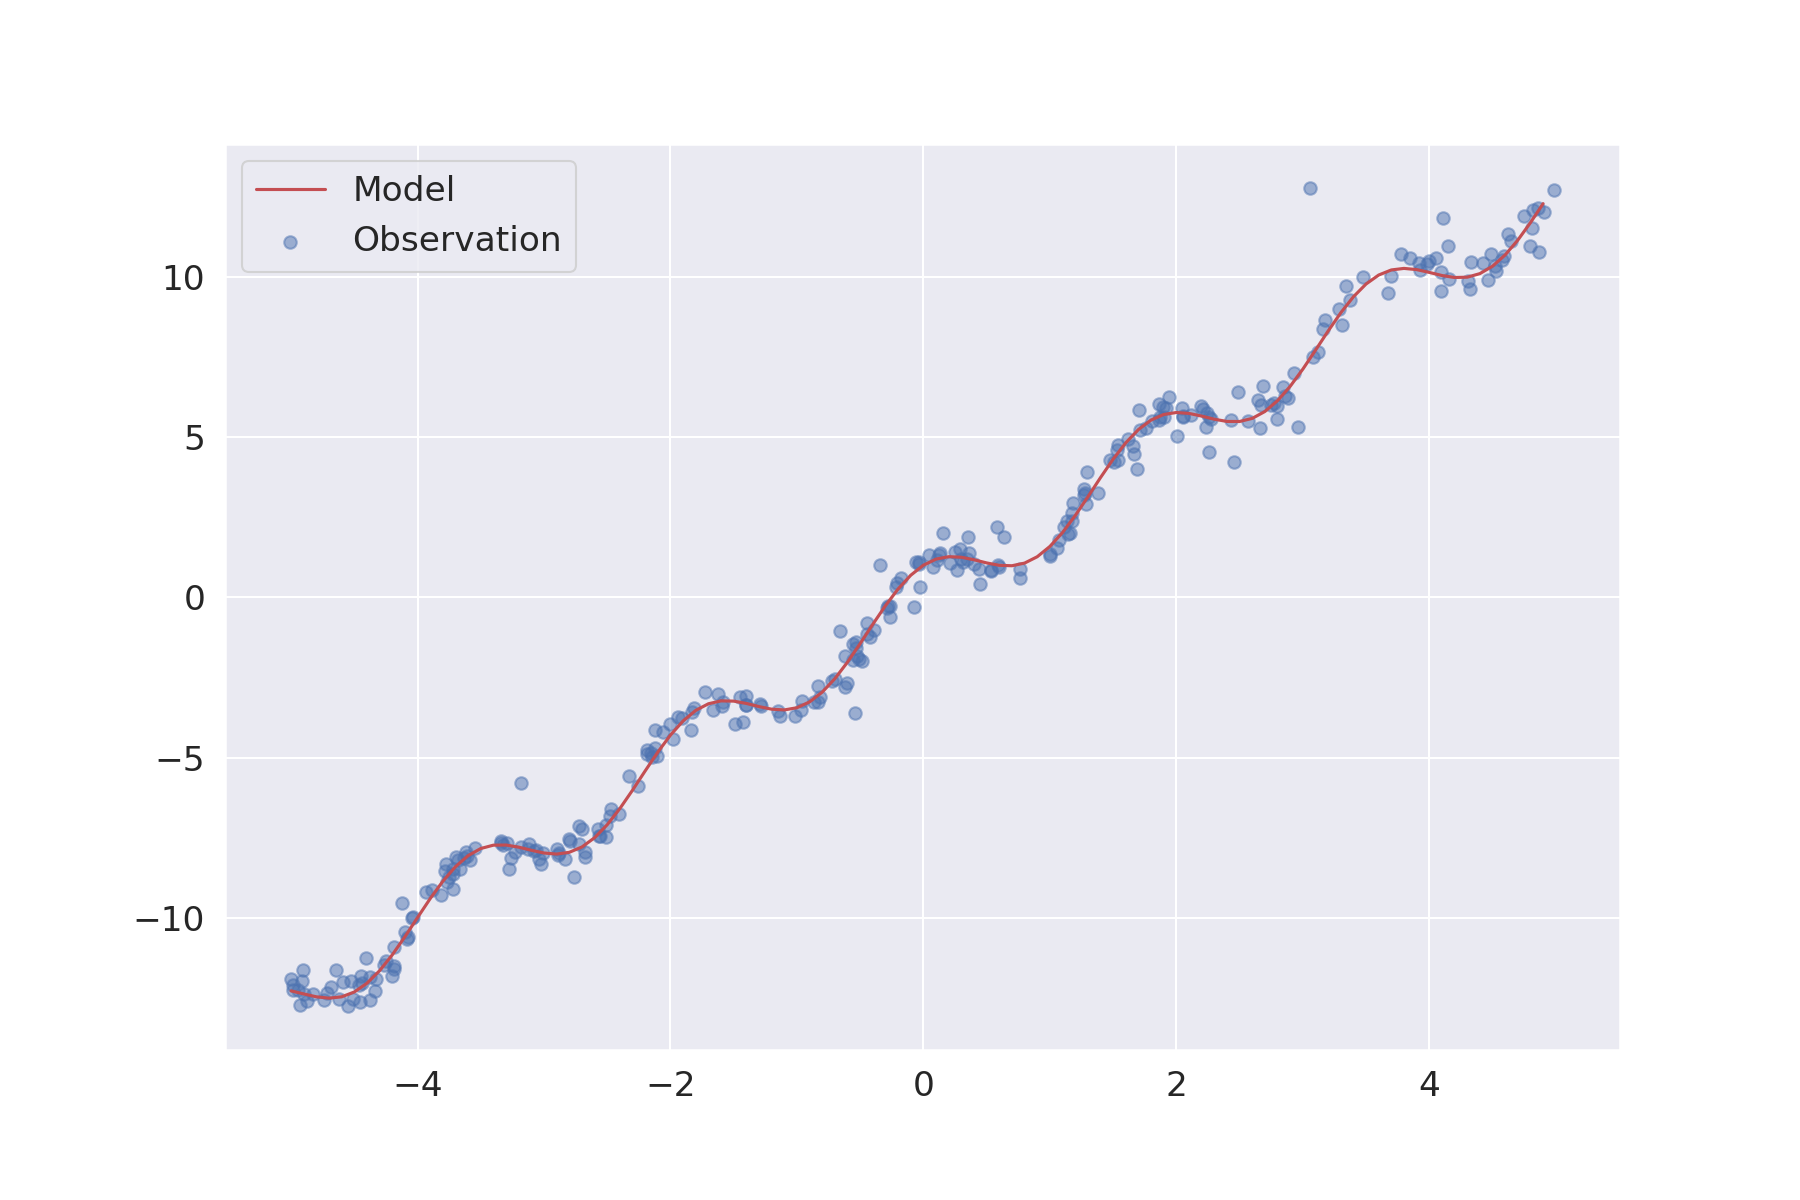

In [45]:
Image(f'{image_path}/q5a_plot.png')

Use `matplotlib` to generate a scatter-plot and graph. Remember to include the labels `Model` and `Observation`.

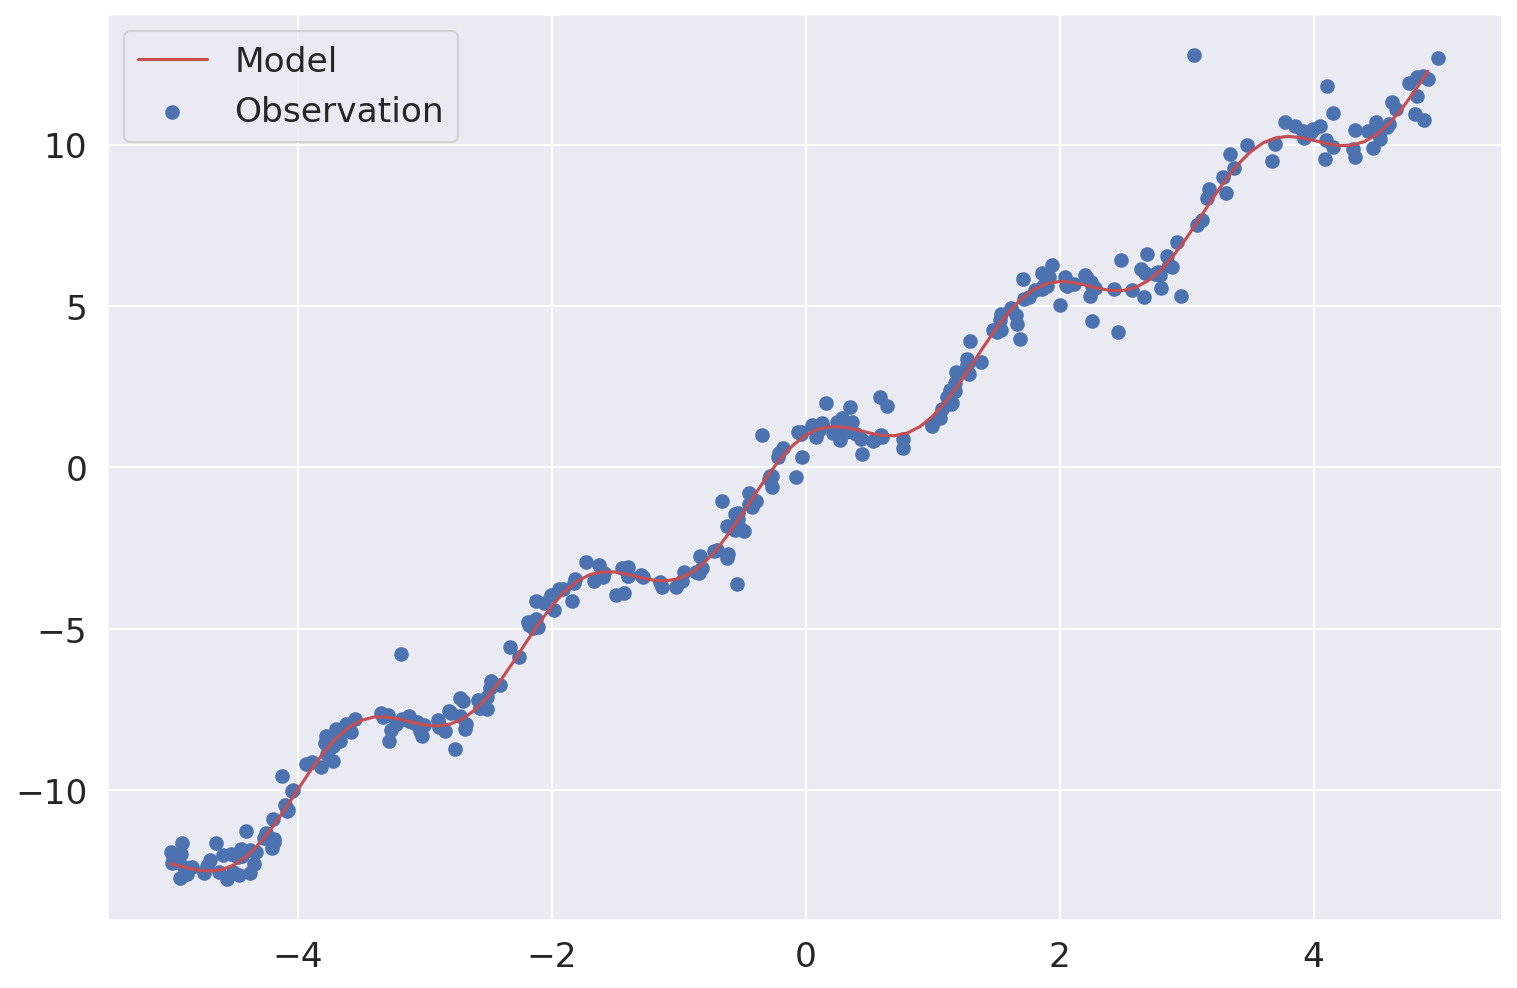

In [46]:
theta_hat, theta_history, average_loss_history = grad_desc(data["x"], 
                                                                 data["y"],  
                                                                 initial_guess(3), 
                                                                 num_iter=20, 
                                                                 alpha=0.1)



xrange = np.arange(-5,5,0.1)
y_hat = cos_model(xrange, theta_hat[0], theta_hat[1])
#plot scatter
plt.scatter(data['x'], data['y'], label = 'Observation')
#plot line
plt.plot(xrange, y_hat, color = 'r', label = "Model")
plt.legend()
# YOUR CODE HERE
#raise NotImplementedError()

q5a_gca = plt.gca() # keep for testing

In [47]:
# TEST 

assert "q5a_gca" in locals() 
assert  len(q5a_gca.get_legend().get_texts()) == 2


It appears that we have fit the nonlinear model to the data. The observed values are close to the predicted values.

### Question 5b

Like Question 2e, we want to plot the residuals.  We will use the parameters determined from fixed learning rate with initial guess `[3,3]`. Duplicate your code from Question 2e replacing `linear_model` with `cos_model`.

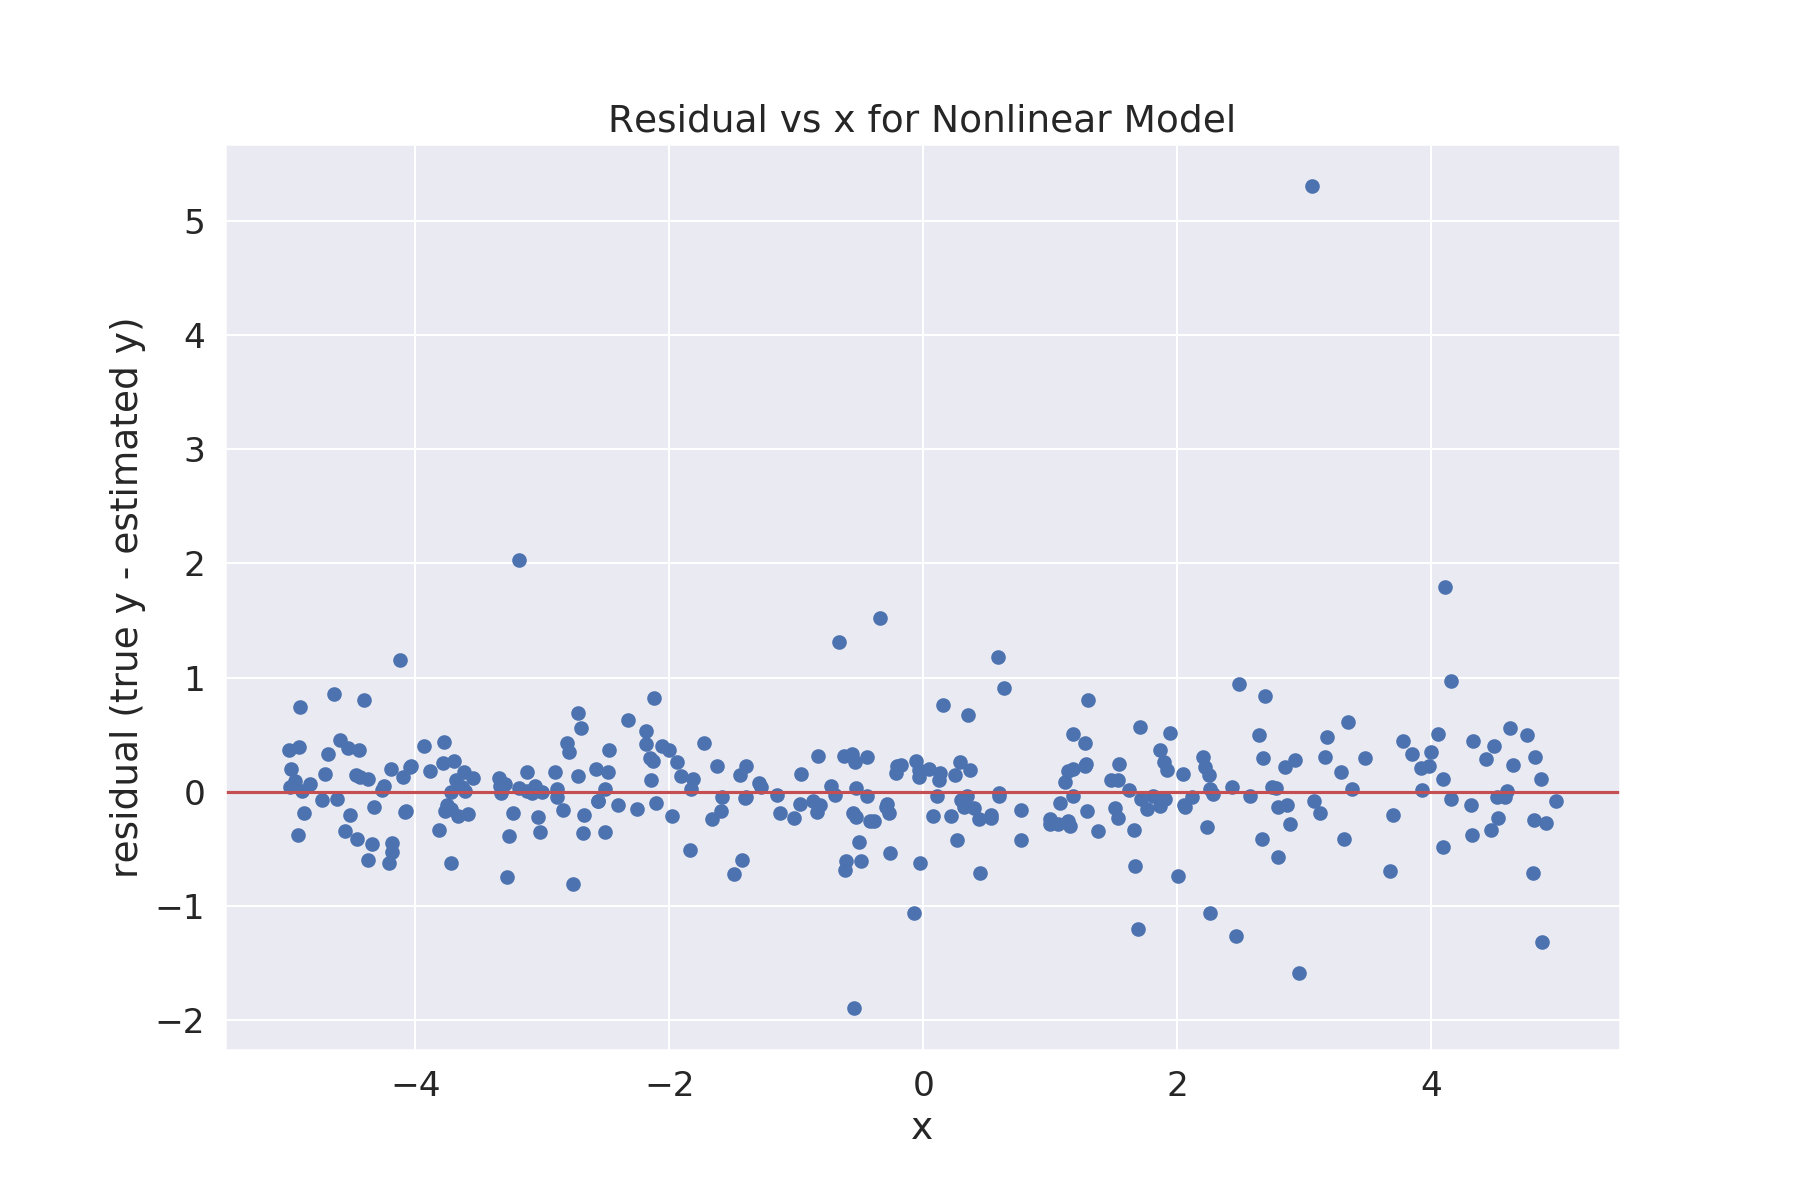

In [48]:
Image(f"{image_path}/residual_nonlinear.png")

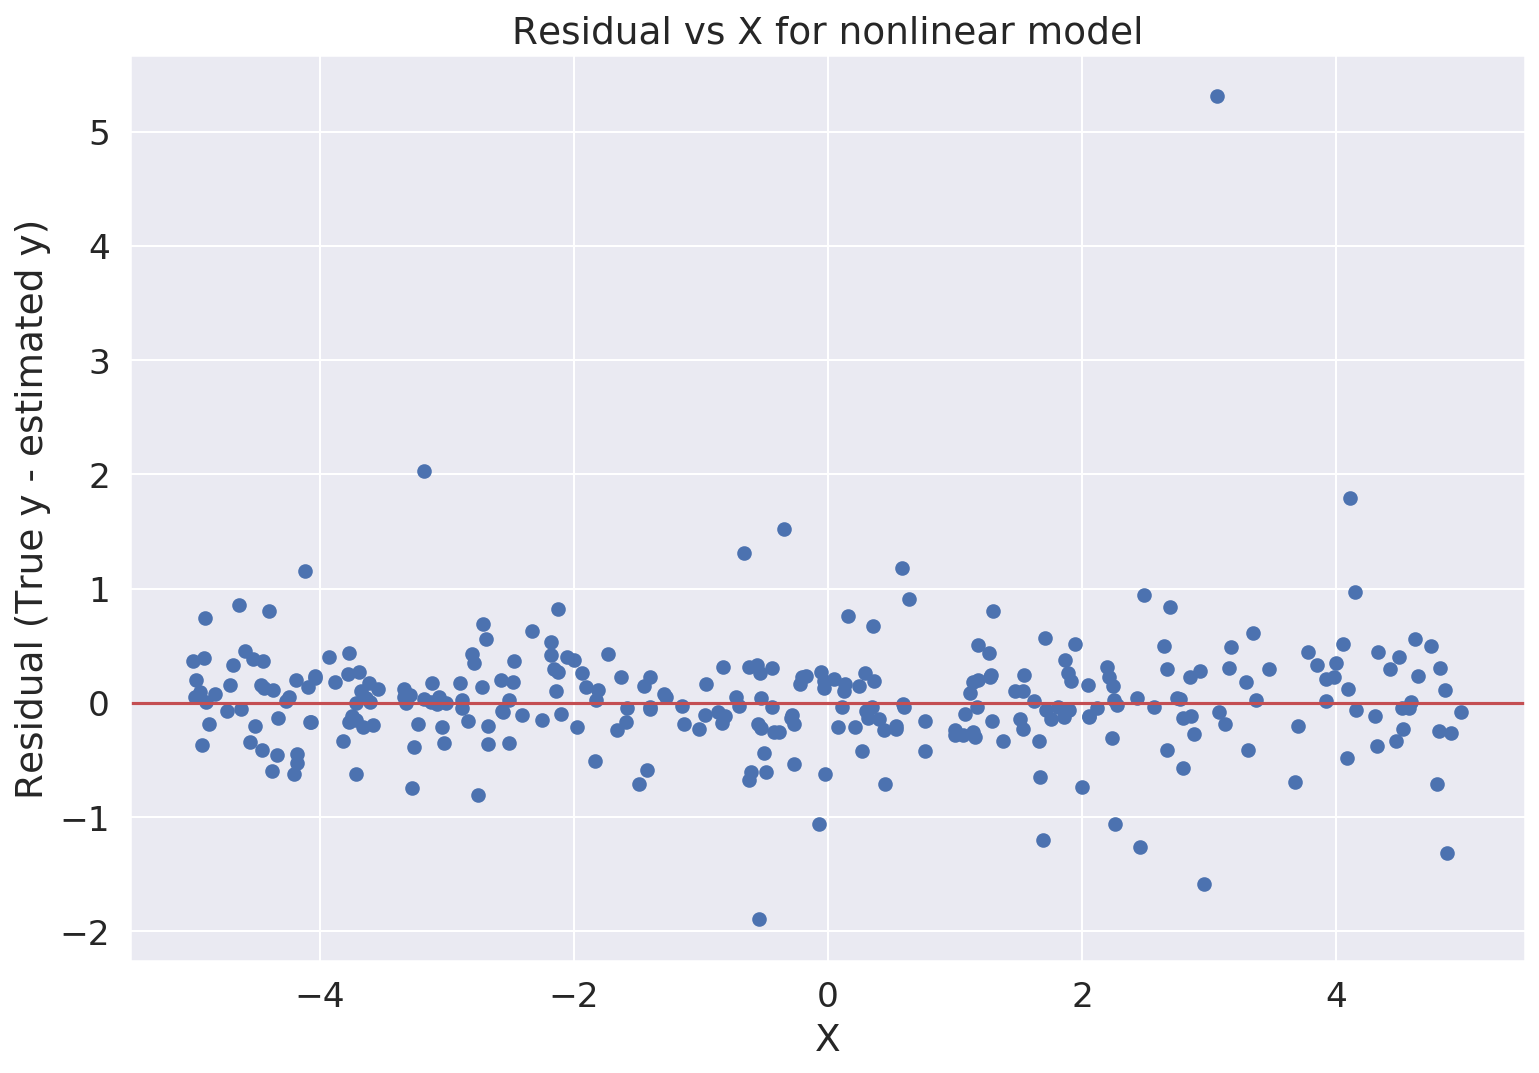

In [49]:
def visualize_residual_nonlinear(x, y):
    """
    Plot a scatter plot of the residuals, the remaining 
    values after removing the nonlinear model from our data.

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    """
    
    theta_hat, theta_history, average_loss_history = grad_desc(x, y, initial_guess(3), num_iter=20, alpha=0.1)

    residual = y - cos_model(x, theta_hat[0], theta_hat[1])
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    plt.scatter(x, residual)
    plt.xlabel("X")
    plt.ylabel("Residual (True y - estimated y)")
    plt.title("Residual vs X for nonlinear model")
    plt.axhline(y=0, color = 'r')
visualize_residual_nonlinear(data["x"], data["y"])

q5b_gca = plt.gca() # keep this line for testing

In [50]:
# TEST 

assert "q5b_gca" in locals()
assert set(data["x"]) == set(dsua_112_utils.get_scatter(q5b_gca)[:,0])


We have have an improvement from Question 2e. The pattern has disappeared from the scatter-plot.

### Question 5c

We want to compare the different learning rates. Plot the average loss historgy from Question 4c and Question 4d.

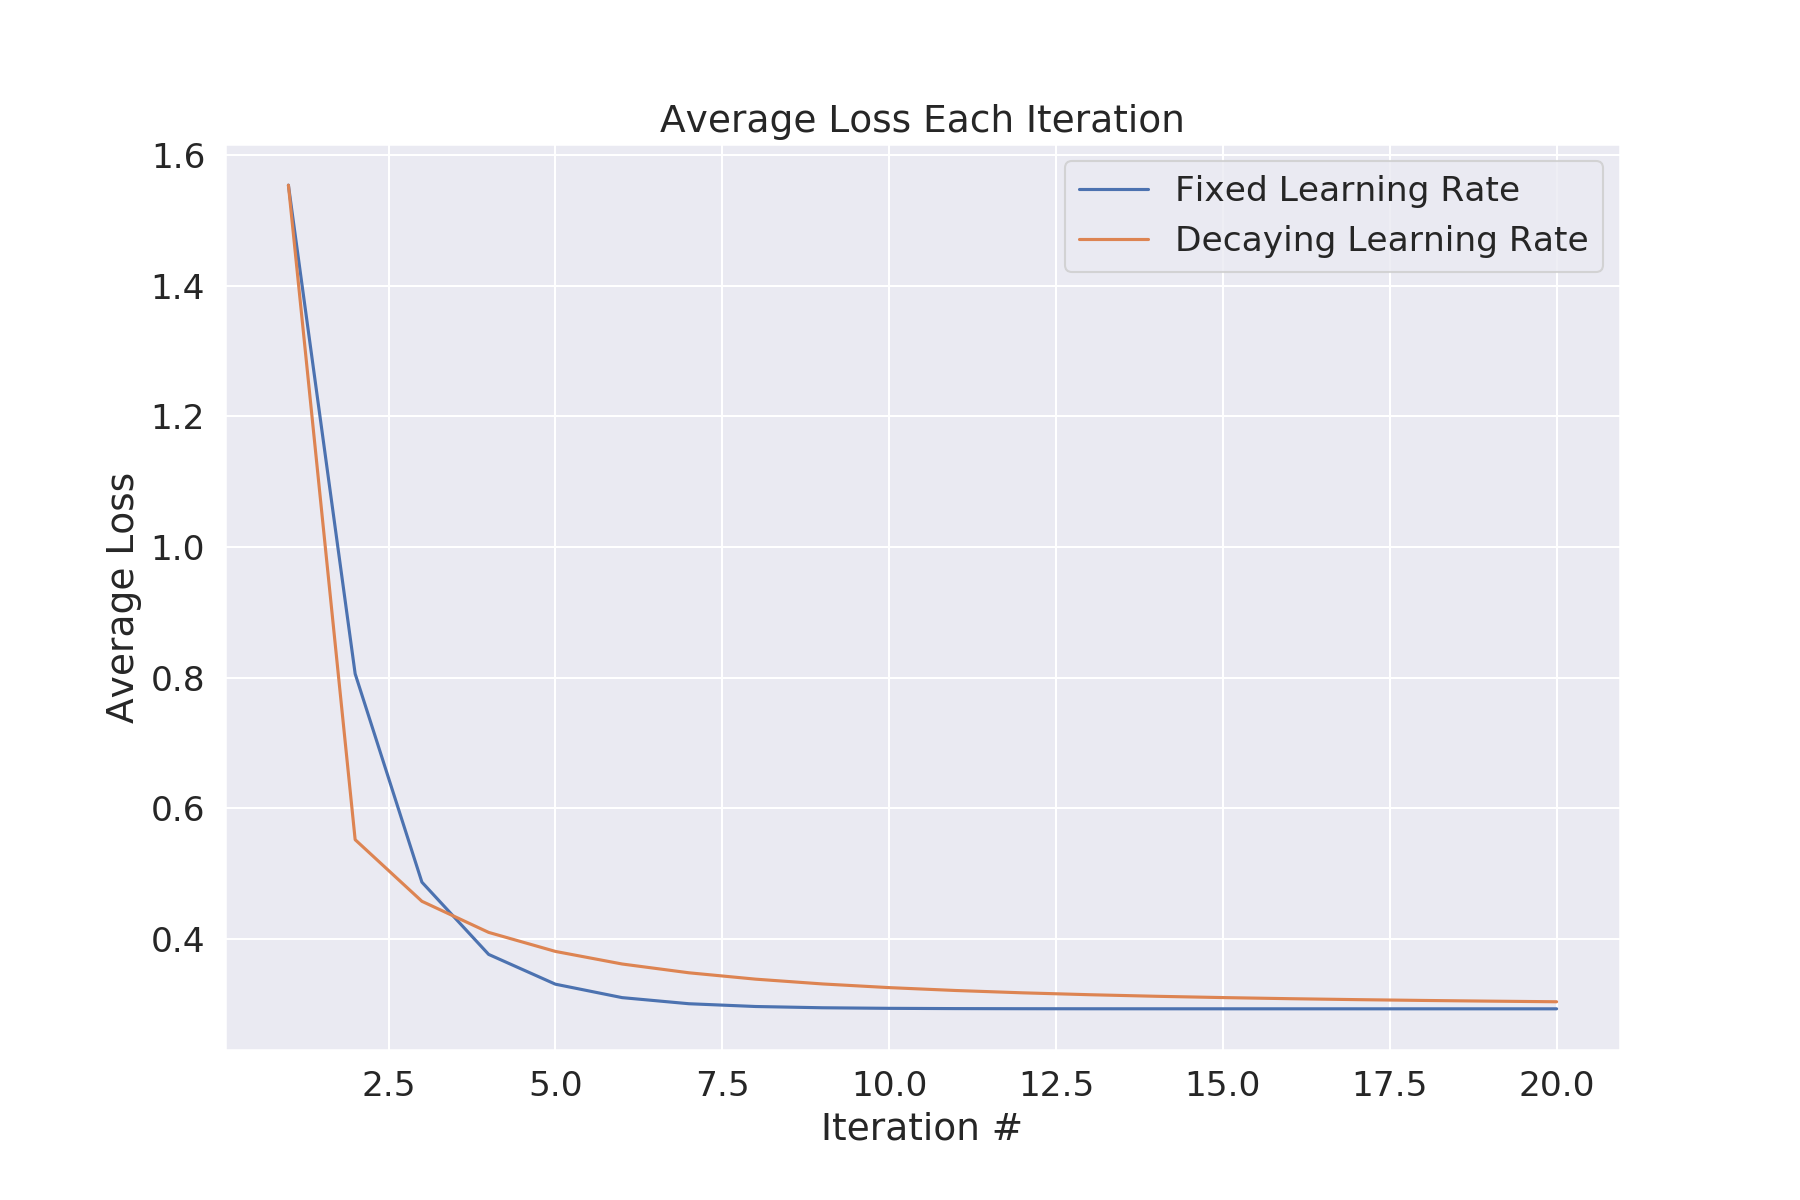

In [51]:
Image(f"{image_path}/learning_rates.png")

Text(0.5, 1.0, 'Average Loss Function Each Iteration')

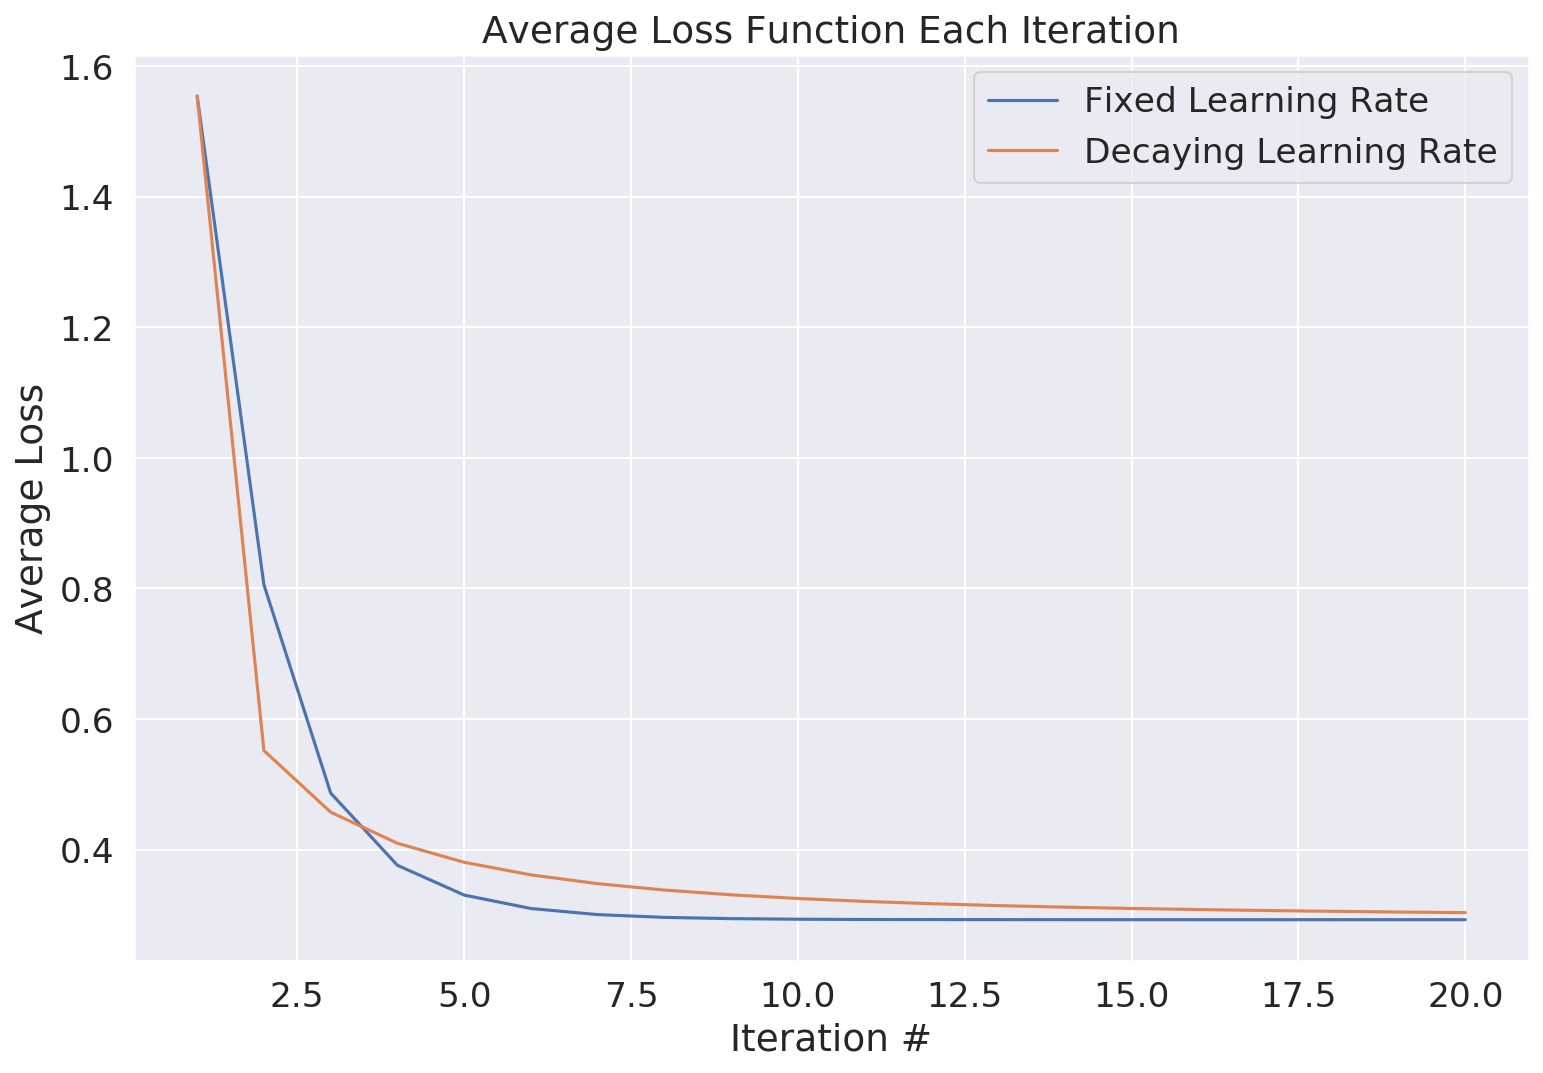

In [52]:
theta_hat, theta_history, average_loss_history = grad_desc(data["x"], data["y"], initial_guess(3), num_iter=20, alpha=0.1)

theta_hat_decay, theta_history_decay, average_loss_history_decay = grad_desc_decay(data["x"], 
                                                                                   data["y"], 
                                                                                   initial_guess(3), 
                                                                                   num_iter=20, 
                                                                                   alpha=0.1)

plt.plot(np.arange(1, len(average_loss_history) + 1), average_loss_history, label='Fixed Learning Rate')
plt.plot(np.arange(1, len(average_loss_history) + 1), average_loss_history_decay, label='Decaying Learning Rate')
plt.legend()
plt.xlabel("Iteration #")
plt.ylabel("Average Loss")
plt.title("Average Loss Function Each Iteration")
# YOUR CODE HERE
#raise NotImplementedError()

Note that the average loss is smaller for fixed learning rate. However, the decaying learning rate will determine the parameters faster than the fixed learning rate.

### Question 5d : 
In Question 5c, we studied the average loss function at each iteration. We can study the value of the parameters for each iteraion. Below we have 3-dimensional plots for the parameters at each iteration. **Note that we have provided the code for you. You are not required to give an answer.** You can just run the cells to generate the charts and the widgets to pane or zoom. 

In [53]:
theta_hat, theta_history, average_loss_history = grad_desc(data["x"], data["y"], initial_guess(3), num_iter=20, alpha=0.1)

theta_history = np.vstack(theta_history)
average_loss_history = np.array(average_loss_history)

dsua_112_utils.plot_3d(theta_history[:, 0], 
                       theta_history[:, 1], 
                       average_loss_history, 
                       mse, 
                       cos_model, 
                       data["x"].values, 
                       data["y"].values, 
                       "Gradient Descent with Fixed Learning Rate")

In [54]:
theta_hat, theta_history, average_loss_history = grad_desc_decay(data["x"], data["y"], initial_guess(3), num_iter=20, alpha=0.1)

theta_history = np.vstack(theta_history)
average_loss_history = np.array(average_loss_history)

dsua_112_utils.plot_3d(theta_history[:, 0], 
                       theta_history[:, 1], 
                       average_loss_history, 
                       mse, 
                       cos_model, 
                       data["x"].values, 
                       data["y"].values, 
                       "Gradient Descent with Decreasing Learning Rate")

### Question 5e
Another common way of visualizing 3D dynamics is with a _contour_ plot. Please run the following cell.

In [55]:
theta_hat, theta_history, average_loss_history = grad_desc(data["x"], data["y"], initial_guess(3), num_iter=20, alpha=0.1)

theta_history = np.vstack(theta_history)

dsua_112_utils.contour_plot('Gradient Descent with Fixed Learning Rate', theta_history, 
                       mse, 
                       cos_model, 
                       data["x"].values, 
                       data["y"].values)

In [56]:
theta_hat, theta_history, average_loss_history = grad_desc_decay(data["x"], data["y"], initial_guess(3), num_iter=20, alpha=0.1)

theta_history = np.vstack(theta_history)

dsua_112_utils.contour_plot('Gradient Descent with Decaying Learning Rate', theta_history, 
                       mse, 
                       cos_model, 
                       data["x"].values, 
                       data["y"].values)

Note that the trajectory of gradient descent with fixed learning rate is less direct than than the trajectory of gradient descent with decaying learning rate.